In [1]:
import pandas as pd
from glob import glob as lsfiles
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import os
import matplotlib as mpl


from matplotlib import font_manager as fm, rcParams
fpath_reg = os.path.join(mpl.get_data_path(), "/Library/Fonts/RobotoCondensed-Regular.ttf")
prop_reg = fm.FontProperties(fname=fpath_reg)
fpath_light = os.path.join(mpl.get_data_path(), "/Library/Fonts/RobotoCondensed-light.ttf")
prop_light = fm.FontProperties(fname=fpath_light)

pd.options.mode.chained_assignment = None  # default='warn'



In [2]:
mpl.__version__ # need version 3.5.1

'3.5.1'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [123]:
modelmap = {'Ensemble':r'Ensemble_vincent$^2$', "Ensemble_LOP":r"Ensemble_LOP$^2$","Ensemble_LOP_untrimmed":r"Ensemble_LOP_untrimmed$^2$",
            "JHU_IDD-CovidSP":'A', "MOBS_NEU-GLEAM_COVID":'B', "UNCC-hierbin":'C', "USC-SIkJalpha":'D', 
            "UVA-EpiHiper":'E', "UVA-adaptive":'F', 'CU-AGE-ST':'G', 'JHUAPL-Bucky':'H', 'Karlen-pypm':'I',
            "NCSU-COVSIM":'J', "NotreDame-FRED":'K', "UTA-ImmunoSEIRS":'L' }

In [5]:
df_hosp = pd.read_pickle('df_all_hosp.pkl')
df_death = pd.read_pickle('df_all_death.pkl')
df_case = pd.read_pickle('df_all_case.pkl')

In [6]:
df_hosp['WIS_normalized'] = df_hosp['WIS']/df_hosp['Population']
df_death['WIS_normalized'] = df_death['WIS']/df_death['Population']
df_case['WIS_normalized'] = df_case['WIS']/df_case['Population']

In [7]:
df_hosp = df_hosp.rename(columns= {"WIS_normalized":"values","Model":"group"})
df_death = df_death.rename(columns= {"WIS_normalized":"values","Model":"group"})
df_case = df_case.rename(columns= {"WIS_normalized":"values","Model":"group"})


In [8]:
df_case.head()

,group,WIS,50% Coverage,95% Coverage,Location,Population,Label,values
0,Ensemble,9909.781019,0.666667,0.916667,Alabama,4903185,Median aggregate,0.002021
1,Ensemble_LOP,9420.065313,0.916667,1.000000,Alabama,4903185,Median aggregate,0.001921
2,Ensemble_LOP_untrimmed,11337.379747,0.916667,1.000000,Alabama,4903185,Median aggregate,0.002312
3,JHU_IDD-CovidSP,8931.475753,0.833333,1.000000,Alabama,4903185,Median aggregate,0.001822
4,MOBS_NEU-GLEAM_COVID,8961.080594,0.250000,0.416667,Alabama,4903185,Median aggregate,0.001828


In [9]:
df_hosp.drop(df_hosp[df_hosp.group == 'NotreDame-FRED'].index, inplace=True)
df_hosp.drop(df_hosp[df_hosp.group == 'UTA-ImmunoSEIRS'].index, inplace=True)


df_death.drop(df_death[df_death.group == 'NotreDame-FRED'].index, inplace=True)
df_death.drop(df_death[df_death.group == 'UTA-ImmunoSEIRS'].index, inplace=True)


df_case.drop(df_case[df_case.group == 'NotreDame-FRED'].index, inplace=True)
df_case.drop(df_case[df_case.group == 'UTA-ImmunoSEIRS'].index, inplace=True)


In [10]:
df_case.group.unique()

array(['Ensemble', 'Ensemble_LOP', 'Ensemble_LOP_untrimmed',
       'JHU_IDD-CovidSP', 'MOBS_NEU-GLEAM_COVID', 'UNCC-hierbin',
       'USC-SIkJalpha', 'UVA-EpiHiper', 'UVA-adaptive'], dtype=object)

In [11]:
models = list(df_case.group.unique())
allmed = []
for model in models:
    med = df_case[df_case['group']== model]['WIS'].median()
    allmed.append(med)

In [12]:
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]

In [13]:
#df_hosp.group = df_hosp.group.astype("category")
#df_hosp.group = df_hosp.group.cat.set_categories(modelorder)
#df_hosp.sort_values(["group"])


#df_death.group = df_death.group.astype("category")
#df_death.group = df_death.group.cat.set_categories(modelorder)
#df_death.sort_values(["group"])


df_case.group = df_case.group.astype("category")
df_case.group = df_case.group.cat.set_categories(modelorder)
df_case.sort_values(["group"])

,group,WIS,50% Coverage,95% Coverage,Location,Population,Label,values
233,MOBS_NEU-GLEAM_COVID,10522.598670,0.166667,0.416667,Missouri,6626371,Median aggregate,0.001588
314,MOBS_NEU-GLEAM_COVID,1219.138125,0.250000,0.416667,North Dakota,762062,Median aggregate,0.0016
305,MOBS_NEU-GLEAM_COVID,30517.955188,0.083333,0.250000,North Carolina,10488084,Median aggregate,0.00291
40,MOBS_NEU-GLEAM_COVID,73544.972797,0.250000,0.333333,California,39512223,Median aggregate,0.001861
296,MOBS_NEU-GLEAM_COVID,22742.365331,0.166667,0.333333,New York,19453561,Median aggregate,0.001169
...,...,...,...,...,...,...,...,...
425,USC-SIkJalpha,35119.407679,0.083333,0.333333,Virginia,8535519,Median aggregate,0.004115
235,USC-SIkJalpha,76368.405572,0.166667,0.250000,Missouri,6626371,Median aggregate,0.011525
325,USC-SIkJalpha,32757.613580,0.083333,0.250000,Ohio,11689100,Median aggregate,0.002802
352,USC-SIkJalpha,44835.637699,0.166667,0.250000,Pennsylvania,12801989,Median aggregate,0.003502


In [14]:
models = list(df_case.group.unique())
allmed = []
for model in models:
    med = df_case[df_case['group']== model]['values'].median()
    allmed.append(med)
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]
df_case.group = df_case.group.astype("category")
df_case.group = df_case.group.cat.set_categories(modelorder)
df_case.sort_values(["group"])

,group,WIS,50% Coverage,95% Coverage,Location,Population,Label,values
233,MOBS_NEU-GLEAM_COVID,10522.598670,0.166667,0.416667,Missouri,6626371,Median aggregate,0.001588
278,MOBS_NEU-GLEAM_COVID,11169.455783,0.166667,0.333333,New Jersey,8882190,Median aggregate,0.001258
77,MOBS_NEU-GLEAM_COVID,1025.960873,0.166667,0.416667,District of Columbia,705749,Median aggregate,0.001454
287,MOBS_NEU-GLEAM_COVID,6316.550978,0.083333,0.250000,New Mexico,2096829,Median aggregate,0.003012
296,MOBS_NEU-GLEAM_COVID,22742.365331,0.166667,0.333333,New York,19453561,Median aggregate,0.001169
...,...,...,...,...,...,...,...,...
388,USC-SIkJalpha,20801.159370,0.000000,0.250000,Tennessee,6829174,Median aggregate,0.003046
289,USC-SIkJalpha,27886.682172,0.083333,0.333333,New Mexico,2096829,Median aggregate,0.013299
15,USC-SIkJalpha,15106.936750,0.083333,0.250000,Alaska,731545,Median aggregate,0.020651
107,USC-SIkJalpha,4507.718862,0.250000,0.416667,Hawaii,1415872,Median aggregate,0.003184


In [107]:
from matplotlib import gridspec

In [69]:
def create_penguin_plots(data,kde_args, title ,color = "#49AFB7",color_category=None, group2name = None):
    
    """
    input:
    data (pandas dataframe): with the two columns named group and values
    kde_args (dictionary): contains information for the kde (lw is the line with, bw_adjust changes the smoothing), look up these args in seaborns kde plots to get more info
    color category: colors the dots different colors depending other whether you want to show that
    group2name (dict): keys are the groups (whatever is in the group column) and values are the "names"
    
    output: fig/ax of figure
    """
    #data['values'] = np.log10(data['values'])

    total_groups = data.group.unique().shape[0]
    total_min = 0 #data['values'].min()*-1.2
    total_max = data['values'].max()*1.2


    fig, ax = plt.subplots(total_groups*2,1,figsize = (26,total_groups*1.75),tight_layout = False)
    
    plt.subplots_adjust(hspace=-.08)

    i = 0
    for group, df in data.groupby("group"):


        values = df["values"].values # this is the list of values you are showing in your distribution
        print(group,np.median(values))


        #distribution
        sns.kdeplot(values, ax = ax[i],shade=True,lw=kde_args["lw"],bw_adjust=kde_args["bw_adjust"],color = color,)
        #sns.distplot(US_values, ax = ax[i],hist = False,
        #      kde_kws={"shade":False,"lw":"3"},color = "w")

        min_,max_ = ax[i].get_ylim()

        ax[i].set_ylim(ymin = 0, ymax = max_*1.1)

        
        
        sns.boxplot(values,ax = ax[i+1],color = color, showfliers = False, linewidth=1, orient="h")
        for patch in ax[i+1].patches:
            r, g, b, a = patch.get_facecolor()
            patch.set_facecolor((r, g, b, .1))
            #fc = patch.get_facecolor()
            #patch.set_facecolor(mpl.colors.to_rgba(fc, 0.1))

        if color_category:
            cmap = mpl.cm.get_cmap('Set2', df.continent_label.unique().shape[0])
            ci = 0
            for cont, df_cont in df.groupby(color_category):
                sns.swarmplot(df_cont['values'].values,ax = ax[i+1],color = cmap(ci),alpha = .9,label = cont)
                ci+=1
            if i+1 ==1:
                ax[i+1].legend(loc = 1, prop= prop_light)
        else:
            sns.swarmplot(values,ax = ax[i+1],color = color,alpha = .35,size=3, orient="h") 

        ax[i].axis("off")
        ax[i+1].axis("off")
        
        ax[i+1].set(yticklabels=[])
        ax[i+1].tick_params(left=False)
        
        
      #  ax[i+1].set_xlim(xmin = total_min,xmax = total_max)
       # ax[i].set_xlim(xmin = total_min,xmax = total_max)
        
        ax[i+1].set_xlim(xmin = 0,xmax = 11)
        ax[i].set_xlim(xmin = 0,xmax = 11)
        
        #ax[i+1].set_ylim(-.5,.5)
        
        
        #if i != 6:
        #    ax[i+1].hlines(y = -.6,xmin = total_min,xmax = total_max,linewidth = 2,zorder = 100,color = "#49AFB7")
        groupnames = modelmap[group]
        text = "%s"
        if group2name:
            ax[i].text(.03,0,group2name[group],transform=ax[i].transAxes,  horizontalalignment= "right",\
               fontsize = 14, verticalalignment='center',backgroundcolor = "w")
        else:
            ax[i].text(-.005,0,groupnames,transform=ax[i].transAxes,  horizontalalignment= "right",\
               fontsize = 16, verticalalignment='center',backgroundcolor = "w")
        i +=2
    last = i+1-2
    ax[last].axis("on")
    ax[last].spines["top"].set_visible(False)
    ax[last].spines["left"].set_visible(False)
    ax[last].spines["right"].set_visible(False)
    ax[last].set_facecolor("none")


    #Test
    ticks = ax[last].get_xticks()
    ax[last].tick_params(axis='x', labelsize=15)
    print(ticks)
    #ax[last-1].set_xticks([round(i,4) for i in ticks])
    #ax[last].set_xticklabels(["{:,}".format(int(i)) for i in ticks],  fontsize = 16)
    #ax[last-1].set_xticklabels([round(i,4) for i in ticks],  fontsize = 16)
    
    for t in ticks:
        if t != 0:
            for ii in range(total_groups*2):
                ax[ii].axvline(x = t,ymin = -1,ymax= 2,linewidth = .8,zorder = 0,color = "gray",alpha = 0.5)
                #ax[ii].vlines(x = t+5000,ymin = -.5,ymax= .444,linewidth = .8,zorder = 0,color = "gray",alpha = 0.5)
    plt.suptitle(title, fontsize=22)
    
    plt.xlabel('MAPE value', fontsize=18)

    return fig, ax



Ensemble 2.9686629332157388e-05
Ensemble_LOP 3.8242590381075764e-05
Ensemble_LOP_untrimmed 5.5746901538546634e-05
JHU_IDD-CovidSP 3.338494750873304e-05
MOBS_NEU-GLEAM_COVID 9.32989232270537e-05
UNCC-hierbin 7.278792705482849e-05
USC-SIkJalpha 0.00033411252302202604
UVA-EpiHiper 0.00011571260877289422
UVA-adaptive 0.00012071463629375711
[0.     0.0002 0.0004 0.0006 0.0008 0.001  0.0012]


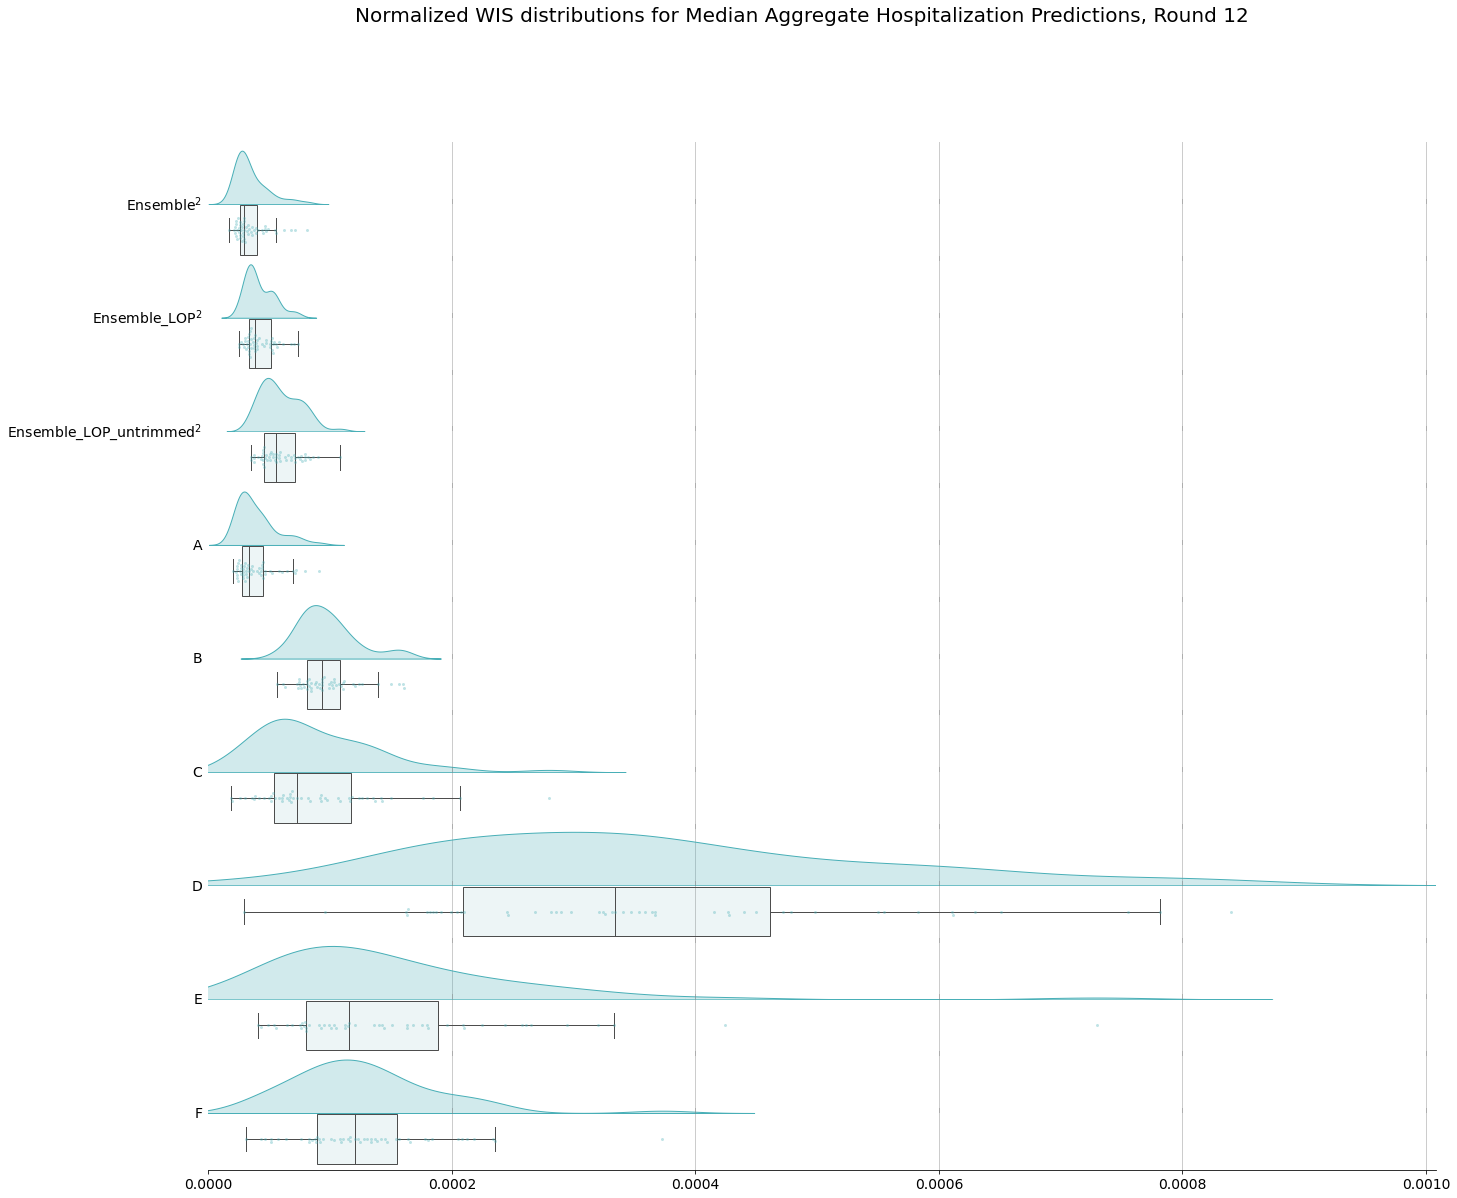

In [18]:

fig, ax_mat = create_penguin_plots(df_hosp,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'Normalized WIS distributions for Median Aggregate Hospitalization Predictions, Round 12')
#plt.savefig('distributionsplot_hosp.pdf')

Ensemble_LOP 1.340363583877401e-05
UVA-EpiHiper 1.3561634198757235e-05
Ensemble_LOP_untrimmed 1.392936219696301e-05
JHU_IDD-CovidSP 1.488484184584286e-05
MOBS_NEU-GLEAM_COVID 1.4934117252348008e-05
Ensemble 1.6250612968414835e-05
UNCC-hierbin 2.7037025076271336e-05
UVA-adaptive 3.47080121783535e-05
USC-SIkJalpha 6.638997459310203e-05
[0.0e+00 5.0e-05 1.0e-04 1.5e-04 2.0e-04 2.5e-04 3.0e-04 3.5e-04 4.0e-04
 4.5e-04]


/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

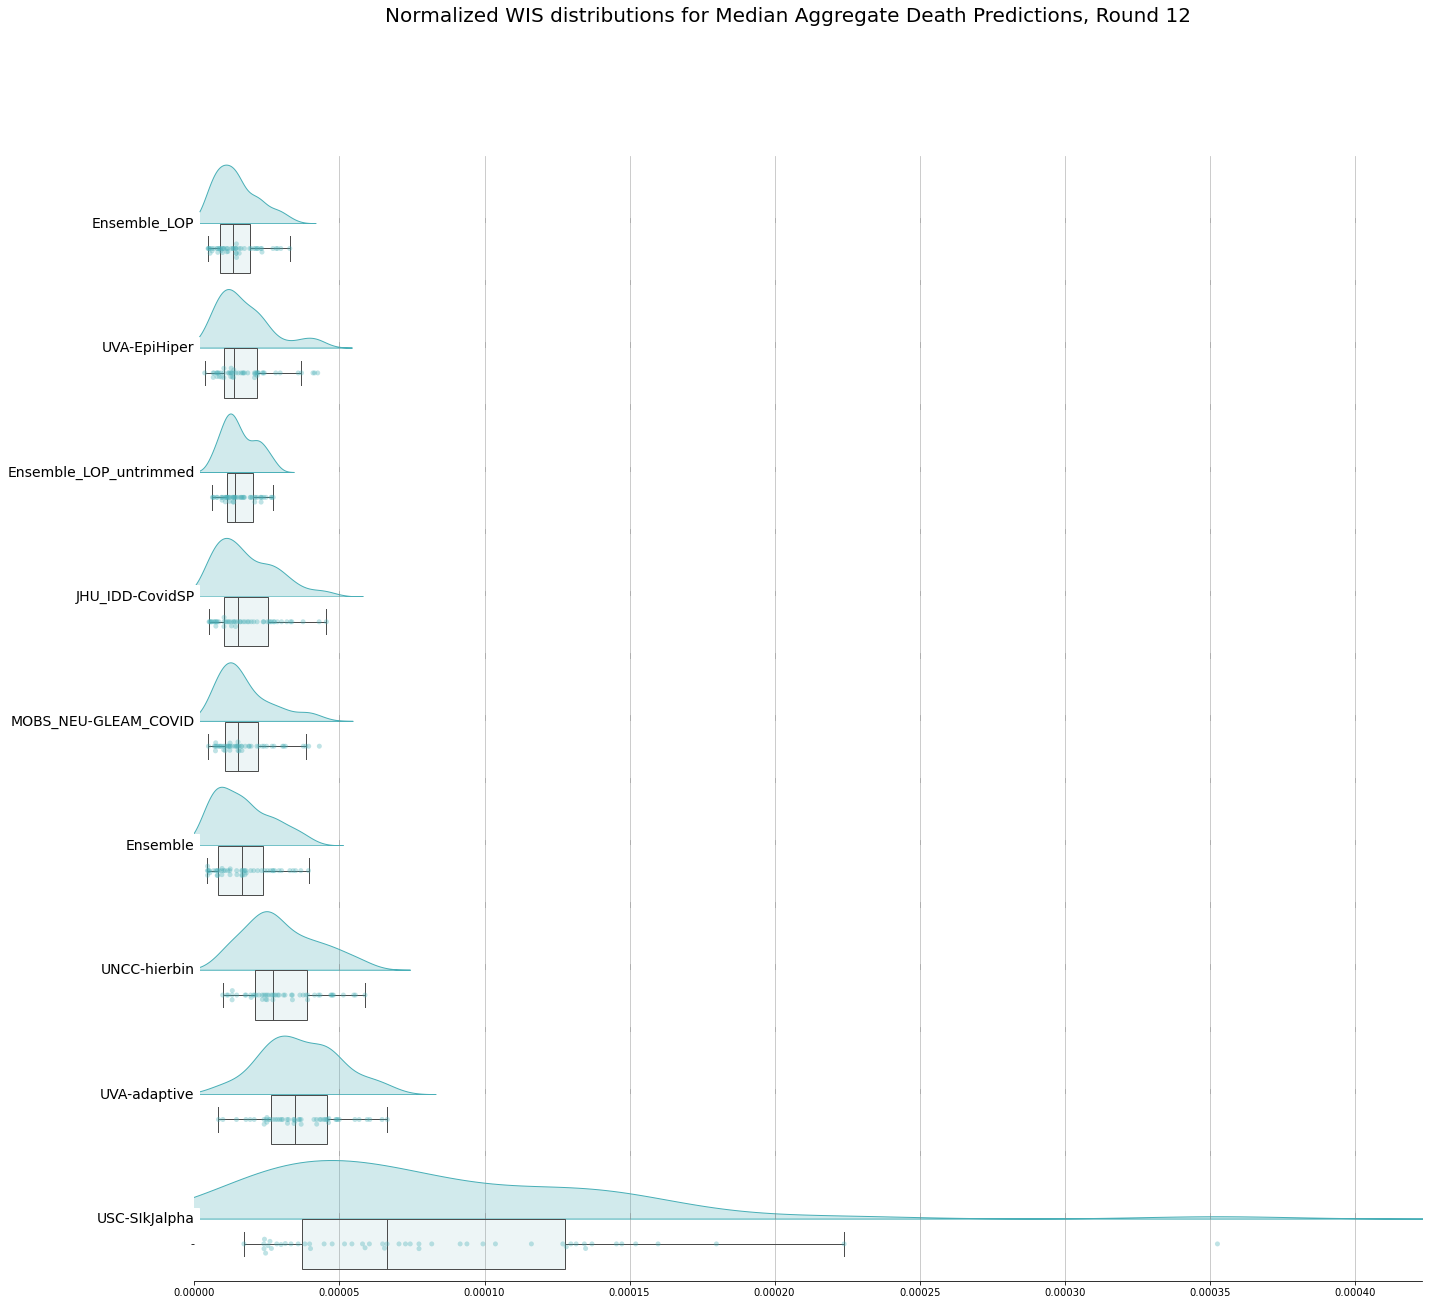

In [316]:
fig, ax_mat = create_penguin_plots(df_death,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'Normalized WIS distributions for Median Aggregate Death Predictions, Round 12')
plt.savefig('distributionsplot_death.pdf')

MOBS_NEU-GLEAM_COVID 0.0022918380762062644
Ensemble_LOP 0.0029477634919837853
Ensemble 0.003069779255628768
Ensemble_LOP_untrimmed 0.003206212568640769
JHU_IDD-CovidSP 0.0035758398735711004
UNCC-hierbin 0.005718642556822831
UVA-EpiHiper 0.006133404711347134
UVA-adaptive 0.006512335623357892
USC-SIkJalpha 0.01004689824561058
[0.   0.01 0.02 0.03 0.04 0.05]


/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

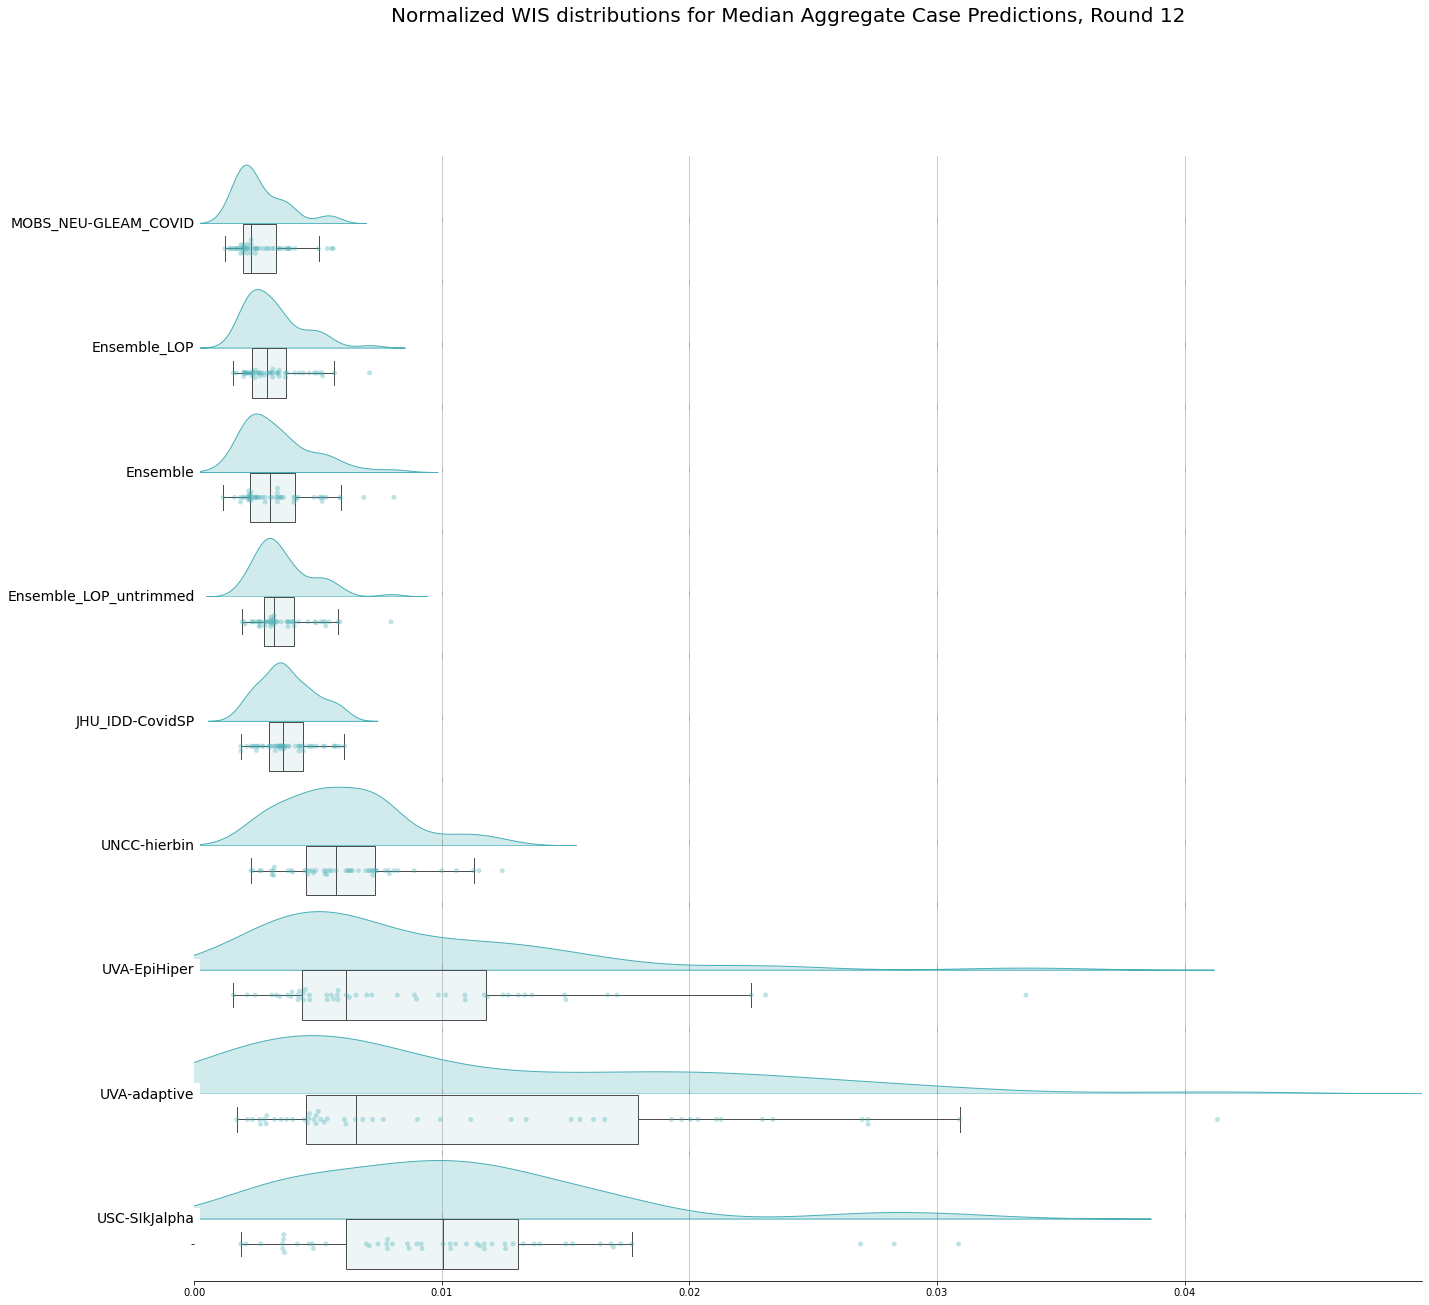

In [315]:
fig, ax_mat = create_penguin_plots(df_case,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'Normalized WIS distributions for Median Aggregate Case Predictions, Round 12')
plt.savefig('distributionsplot_case.pdf')

# Observation-normalized WIS

In [19]:
df_hosp_wisnorm= pd.read_pickle('df_wisnorm_hosp_414.pkl')
df_death_wisnorm = pd.read_pickle('df_wisnorm_death_414.pkl')
df_case_wisnorm = pd.read_pickle('df_wisnorm_case_414.pkl')

In [20]:
df_hosp_wisnorm = df_hosp_wisnorm.rename(columns= {"WIS":"values","Model":"group"})
df_death_wisnorm = df_death_wisnorm.rename(columns= {"WIS":"values","Model":"group"})
df_case_wisnorm = df_case_wisnorm.rename(columns= {"WIS":"values","Model":"group"})


In [21]:
wisnormalldf = pd.concat([df_case_wisnorm, df_death_wisnorm, df_hosp_wisnorm])

In [22]:
wisnormalldf = wisnormalldf[wisnormalldf.group != 'NotreDame-FRED']
wisnormalldf = wisnormalldf[wisnormalldf.group != 'UTA-ImmunoSEIRS']

In [23]:
models = list(wisnormalldf.group.unique())
allmed = []
for model in models:
    med = wisnormalldf[wisnormalldf['group']== model]['values'].median()
    allmed.append(med)
    
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]

wisnormalldf.group = wisnormalldf.group.astype("category")
wisnormalldf.group = wisnormalldf.group.cat.set_categories(modelorder)
wisnormalldf.sort_values(["group"])


,group,values,50% Coverage,95% Coverage,Location,Population,Label
82,Ensemble_LOP,0.510883,0.166667,0.583333,Florida,21477737,Median aggregate
361,Ensemble_LOP,0.953744,0.916667,1.000000,South Carolina,5148714,Median aggregate
73,Ensemble_LOP,0.353024,0.833333,1.000000,District of Columbia,705749,Median aggregate
118,Ensemble_LOP,0.377396,0.000000,1.000000,Illinois,12671821,Median aggregate
217,Ensemble_LOP,0.285740,0.833333,1.000000,Mississippi,2976149,Median aggregate
...,...,...,...,...,...,...,...
195,USC-SIkJalpha,1.380919,0.166667,0.333333,Massachusetts,6892503,Median aggregate
276,USC-SIkJalpha,1.717543,0.166667,0.333333,New Jersey,8882190,Median aggregate
159,USC-SIkJalpha,0.864825,0.250000,0.416667,Kentucky,4467673,Median aggregate
168,USC-SIkJalpha,0.316083,0.500000,0.666667,Louisiana,4648794,Median aggregate


Ensemble_LOP -0.440224579617982
Ensemble -0.4159287307251201
JHU_IDD-CovidSP -0.3324045703917634
Ensemble_LOP_untrimmed -0.32656900860180893
UNCC-hierbin -0.1684308565560914
MOBS_NEU-GLEAM_COVID -0.16270622565726406
UVA-adaptive -0.07082070643296925
UVA-EpiHiper 0.12559958822151956
USC-SIkJalpha 0.2833380869416602
[ 0.  2.  4.  6.  8. 10. 12.]


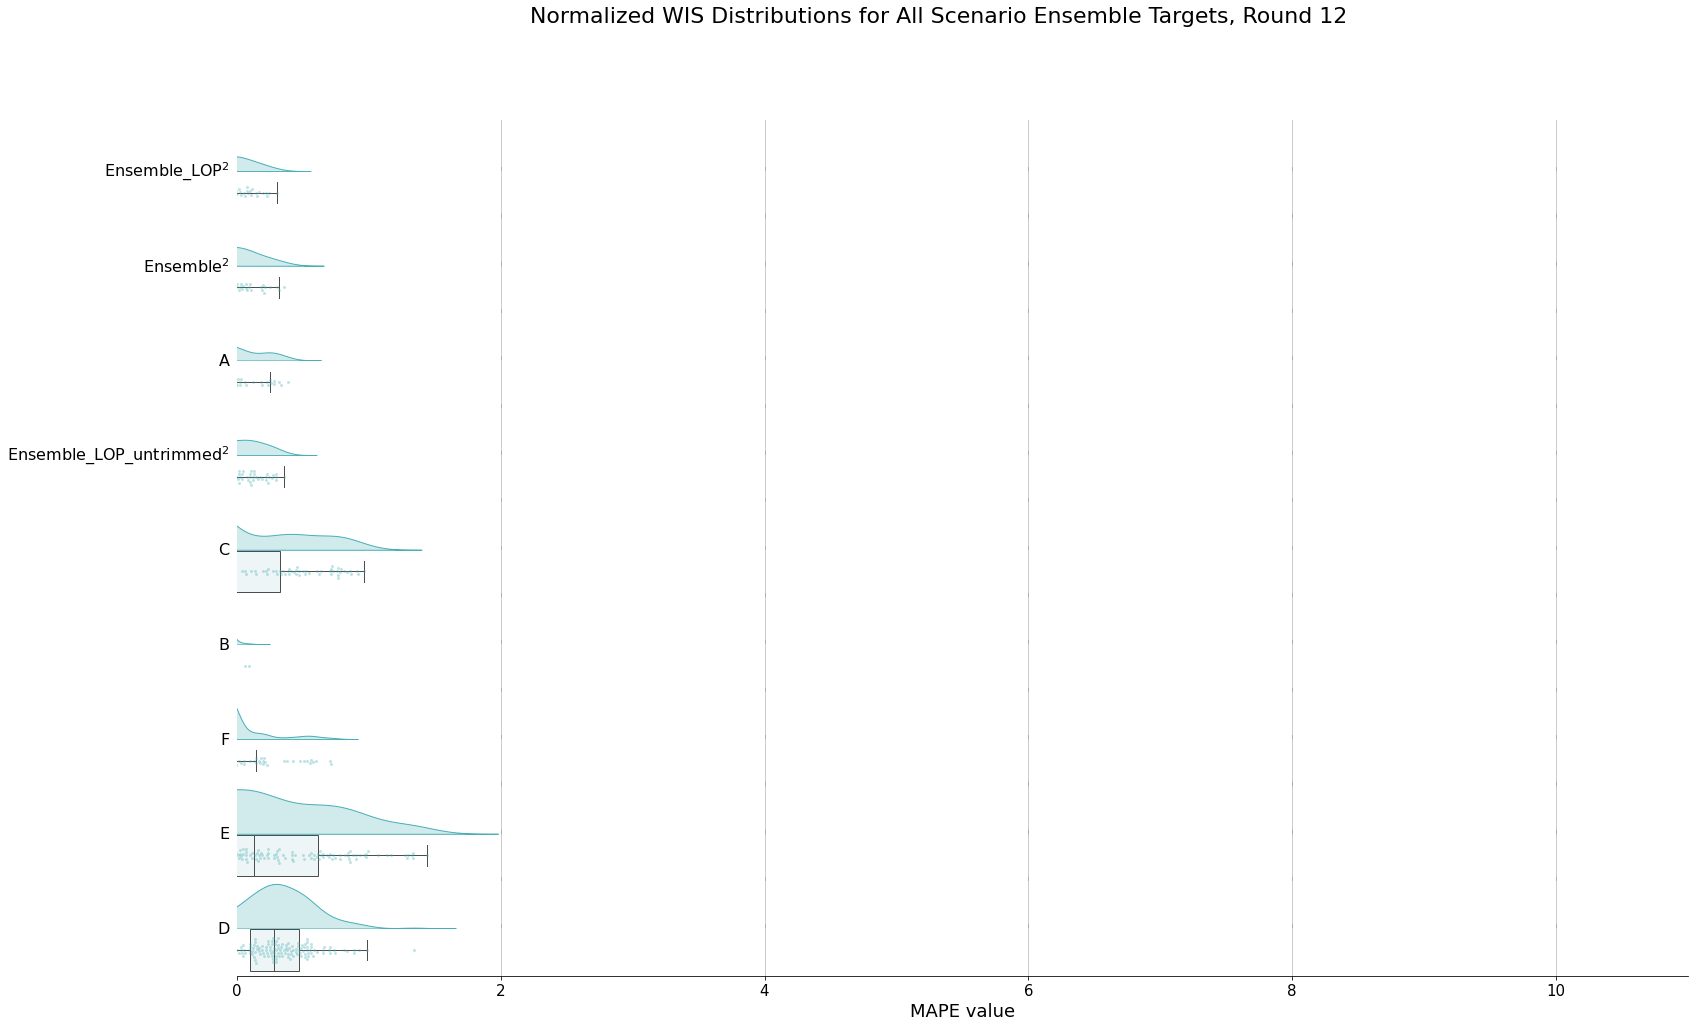

In [70]:


fig, ax_mat = create_penguin_plots(wisnormalldf[wisnormalldf['values'] >= 0],kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'Normalized WIS Distributions for All Scenario Ensemble Targets, Round 12')

#plt.savefig('WISnormdist_54.pdf')

# MAPE Analysis

In [109]:
df_hosp_mape = pd.read_pickle('mapedf_hosp.pkl')
df_death_mape = pd.read_pickle('mapedf_death.pkl')
df_case_mape = pd.read_pickle('mapedf_case.pkl')

In [52]:
df_hosp_mape

,Model,Location,Population,MAPE
0,Ensemble,Alabama,4903185.0,0.485226
1,Ensemble,Alaska,731545.0,0.390487
2,Ensemble,Arizona,7278717.0,0.519135
3,Ensemble,Arkansas,3017804.0,0.543412
4,Ensemble,California,39512223.0,0.538554
...,...,...,...,...
458,UVA-adaptive,Wyoming,578759.0,0.904439
459,UTA-ImmunoSEIRS,California,39512223.0,0.640463
460,UTA-ImmunoSEIRS,Florida,21477737.0,0.691090
461,UTA-ImmunoSEIRS,Massachusetts,6892503.0,0.594476


In [110]:
df_hosp_mape = df_hosp_mape.rename(columns= {"MAPE":"values","Model":"group"})
df_death_mape = df_death_mape.rename(columns= {"MAPE":"values","Model":"group"})
df_case_mape = df_case_mape.rename(columns= {"MAPE":"values","Model":"group"})


In [111]:
models = list(df_hosp_mape.group.unique())
allmed = []
for model in models:
    med = df_hosp_mape[df_hosp_mape['group']== model]['values'].median()
    allmed.append(med)
    
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]

df_hosp_mape.group = df_hosp_mape.group.astype("category")
df_hosp_mape.group = df_hosp_mape.group.cat.set_categories(modelorder)
df_hosp_mape.sort_values(["group"])



models = list(df_death_mape.group.unique())
allmed = []
for model in models:
    med = df_death_mape[df_death_mape['group']== model]['values'].median()
    allmed.append(med)
    
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]

df_death_mape.group = df_death_mape.group.astype("category")
df_death_mape.group = df_death_mape.group.cat.set_categories(modelorder)
df_death_mape.sort_values(["group"])




models = list(df_case_mape.group.unique())
allmed = []
for model in models:
    med = df_case_mape[df_case_mape['group']== model]['values'].median()
    allmed.append(med)
    
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]

df_case_mape.group = df_case_mape.group.astype("category")
df_case_mape.group = df_case_mape.group.cat.set_categories(modelorder)
df_case_mape.sort_values(["group"])

,group,Location,Population,values
462,UTA-ImmunoSEIRS,Texas,28995881.0,0.739088
461,UTA-ImmunoSEIRS,Massachusetts,6892503.0,0.705538
460,UTA-ImmunoSEIRS,Florida,21477737.0,0.742378
459,UTA-ImmunoSEIRS,California,39512223.0,0.699090
228,MOBS_NEU-GLEAM_COVID,Mississippi,2976149.0,0.782732
...,...,...,...,...
394,UVA-EpiHiper,Oregon,4217737.0,5.801096
393,UVA-EpiHiper,Oklahoma,3956971.0,2.781666
392,UVA-EpiHiper,Ohio,11689100.0,8.535312
366,UVA-EpiHiper,Florida,21477737.0,6.357751


Ensemble_LOP_untrimmed 0.38122928068851963
Ensemble_LOP 0.3823882808051249
Ensemble 0.38532902406568637
UNCC-hierbin 0.47396186541207835
JHU_IDD-CovidSP 0.49147797585960246
UTA-ImmunoSEIRS 0.6322300374963545
MOBS_NEU-GLEAM_COVID 0.8808595563856289
UVA-adaptive 0.9228884921668696
UVA-EpiHiper 1.789379989035007
USC-SIkJalpha 2.5427847409088655
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18.]


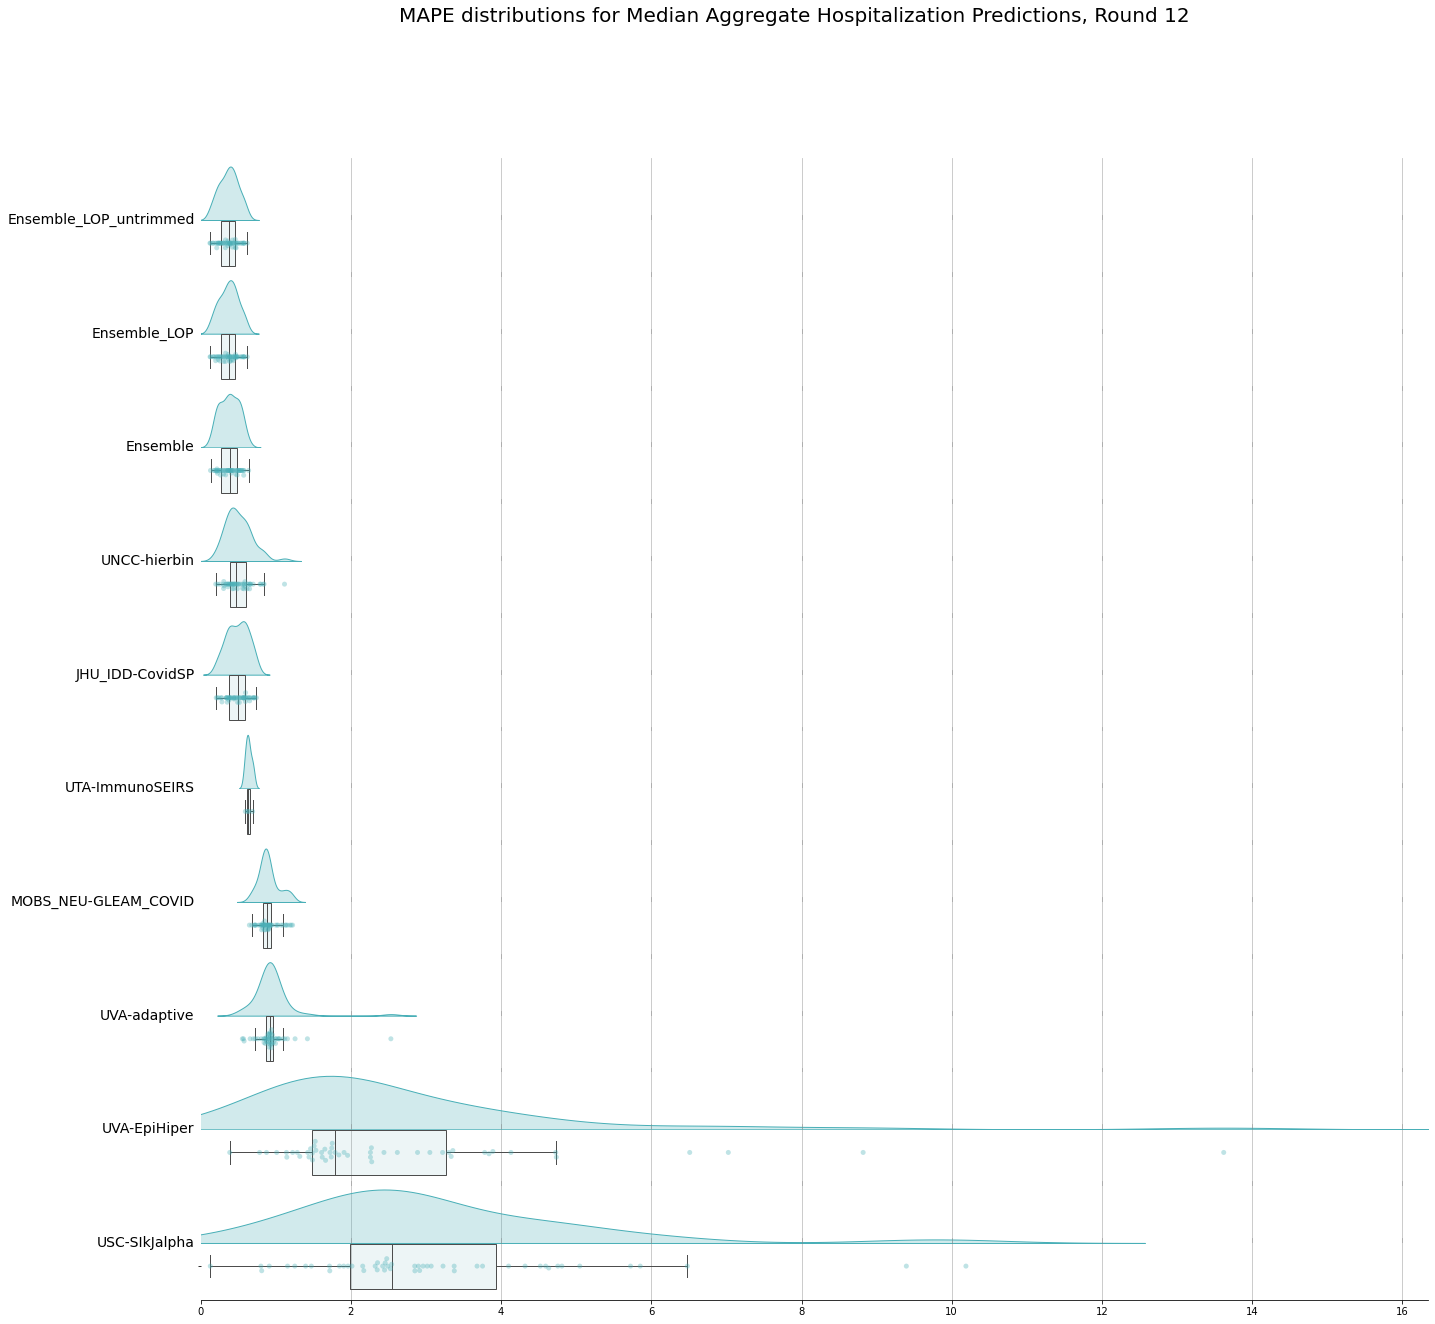

In [102]:
fig, ax_mat = create_penguin_plots(df_hosp_mape,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'MAPE distributions for Median Aggregate Hospitalization Predictions, Round 12')
#plt.savefig('distributionsplot_hosp.pdf')

UTA-ImmunoSEIRS 0.5290453683277593
Ensemble_LOP_untrimmed 0.5837321746376312
Ensemble_LOP 0.5838125342191728
Ensemble 0.5987273229243377
UVA-EpiHiper 0.64602942672221
MOBS_NEU-GLEAM_COVID 0.6736126844218728
JHU_IDD-CovidSP 0.6861072466006635
UNCC-hierbin 0.7203474406310413
NotreDame-FRED 0.9354821321080353
UVA-adaptive 0.9483659008447773
USC-SIkJalpha 2.704373539267966
[ 0.  5. 10. 15. 20. 25. 30. 35. 40.]


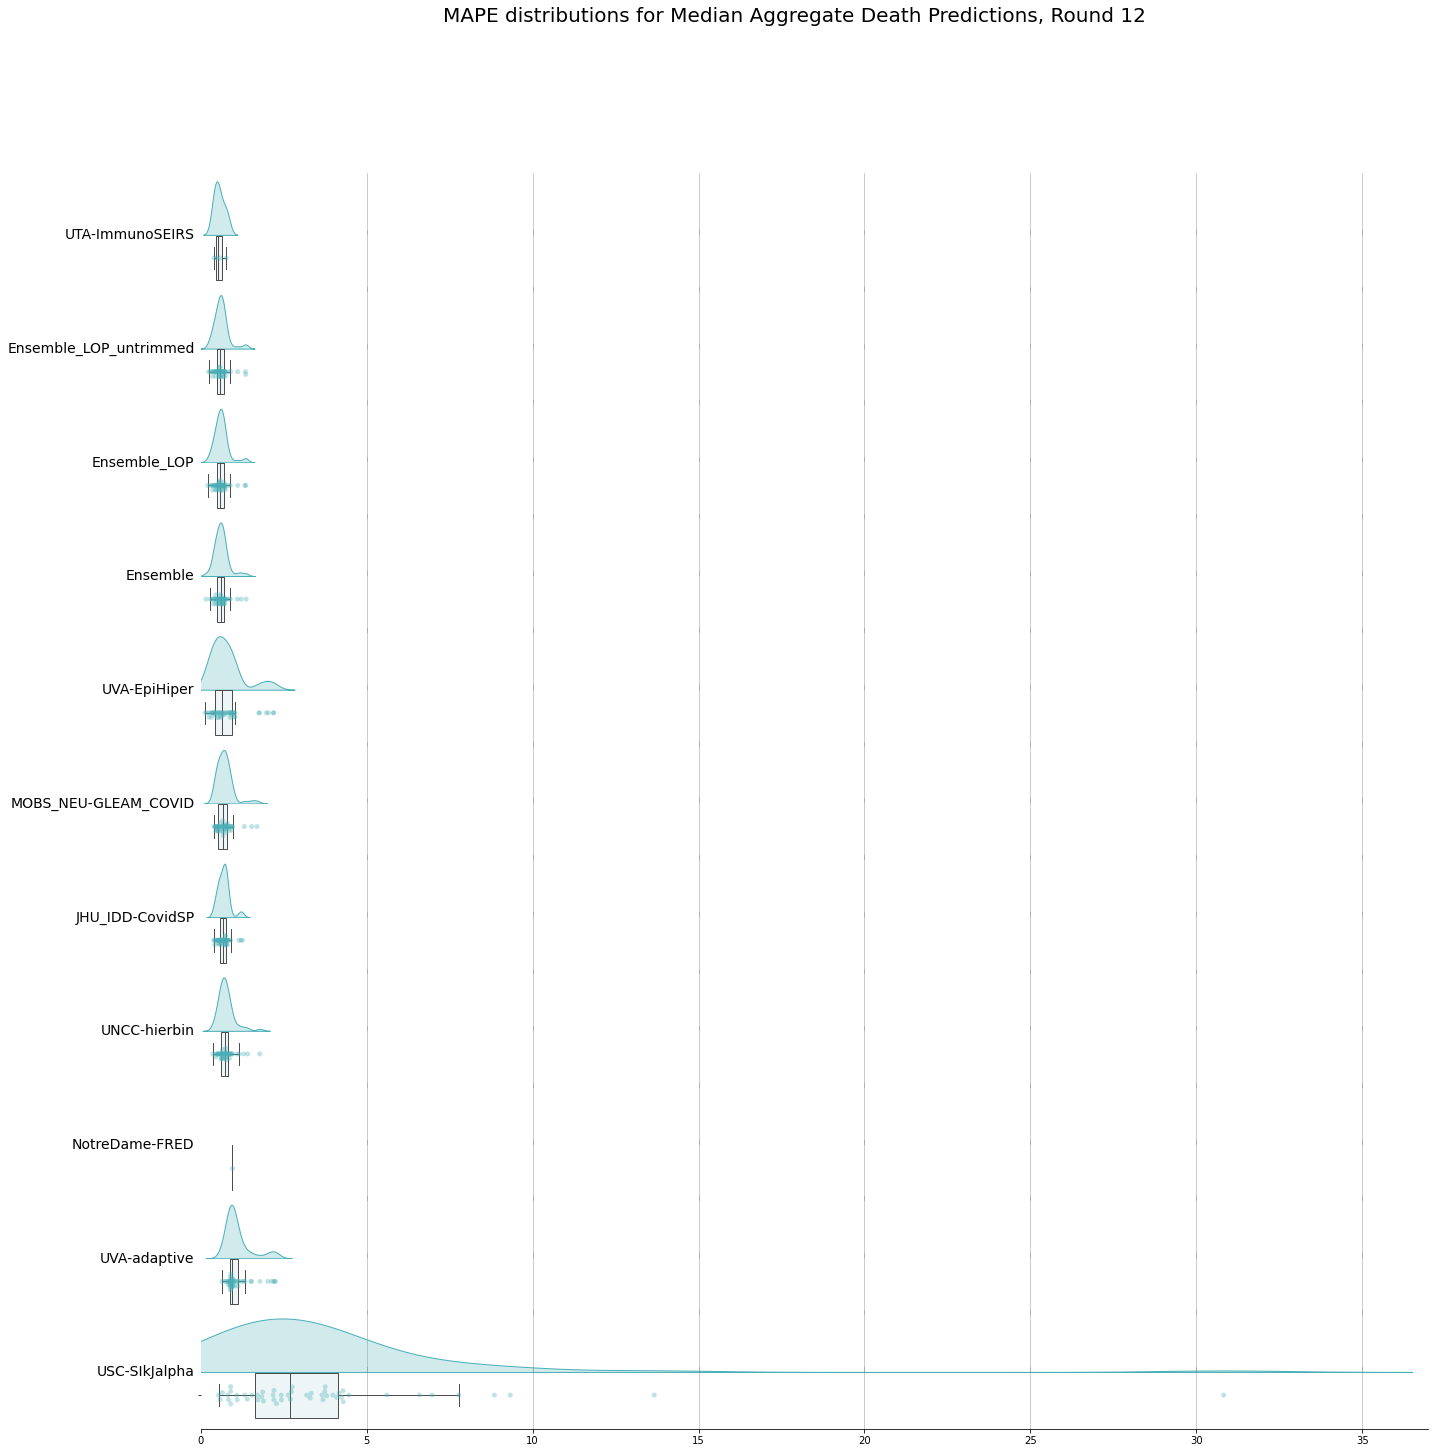

In [103]:
fig, ax_mat = create_penguin_plots(df_death_mape,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'MAPE distributions for Median Aggregate Death Predictions, Round 12')
#plt.savefig('distributionsplot_hosp.pdf')

UTA-ImmunoSEIRS 0.7223126927490617
MOBS_NEU-GLEAM_COVID 0.8534667137822503
UVA-adaptive 1.0585625235879448
Ensemble_LOP_untrimmed 1.1629544392911169
Ensemble_LOP 1.1648429421740902
JHU_IDD-CovidSP 1.1679851019295404
Ensemble 1.4139262231284413
USC-SIkJalpha 2.208165270457067
NotreDame-FRED 2.4817185543896634
UNCC-hierbin 3.8764201380120853
UVA-EpiHiper 7.404265413920517
[0]


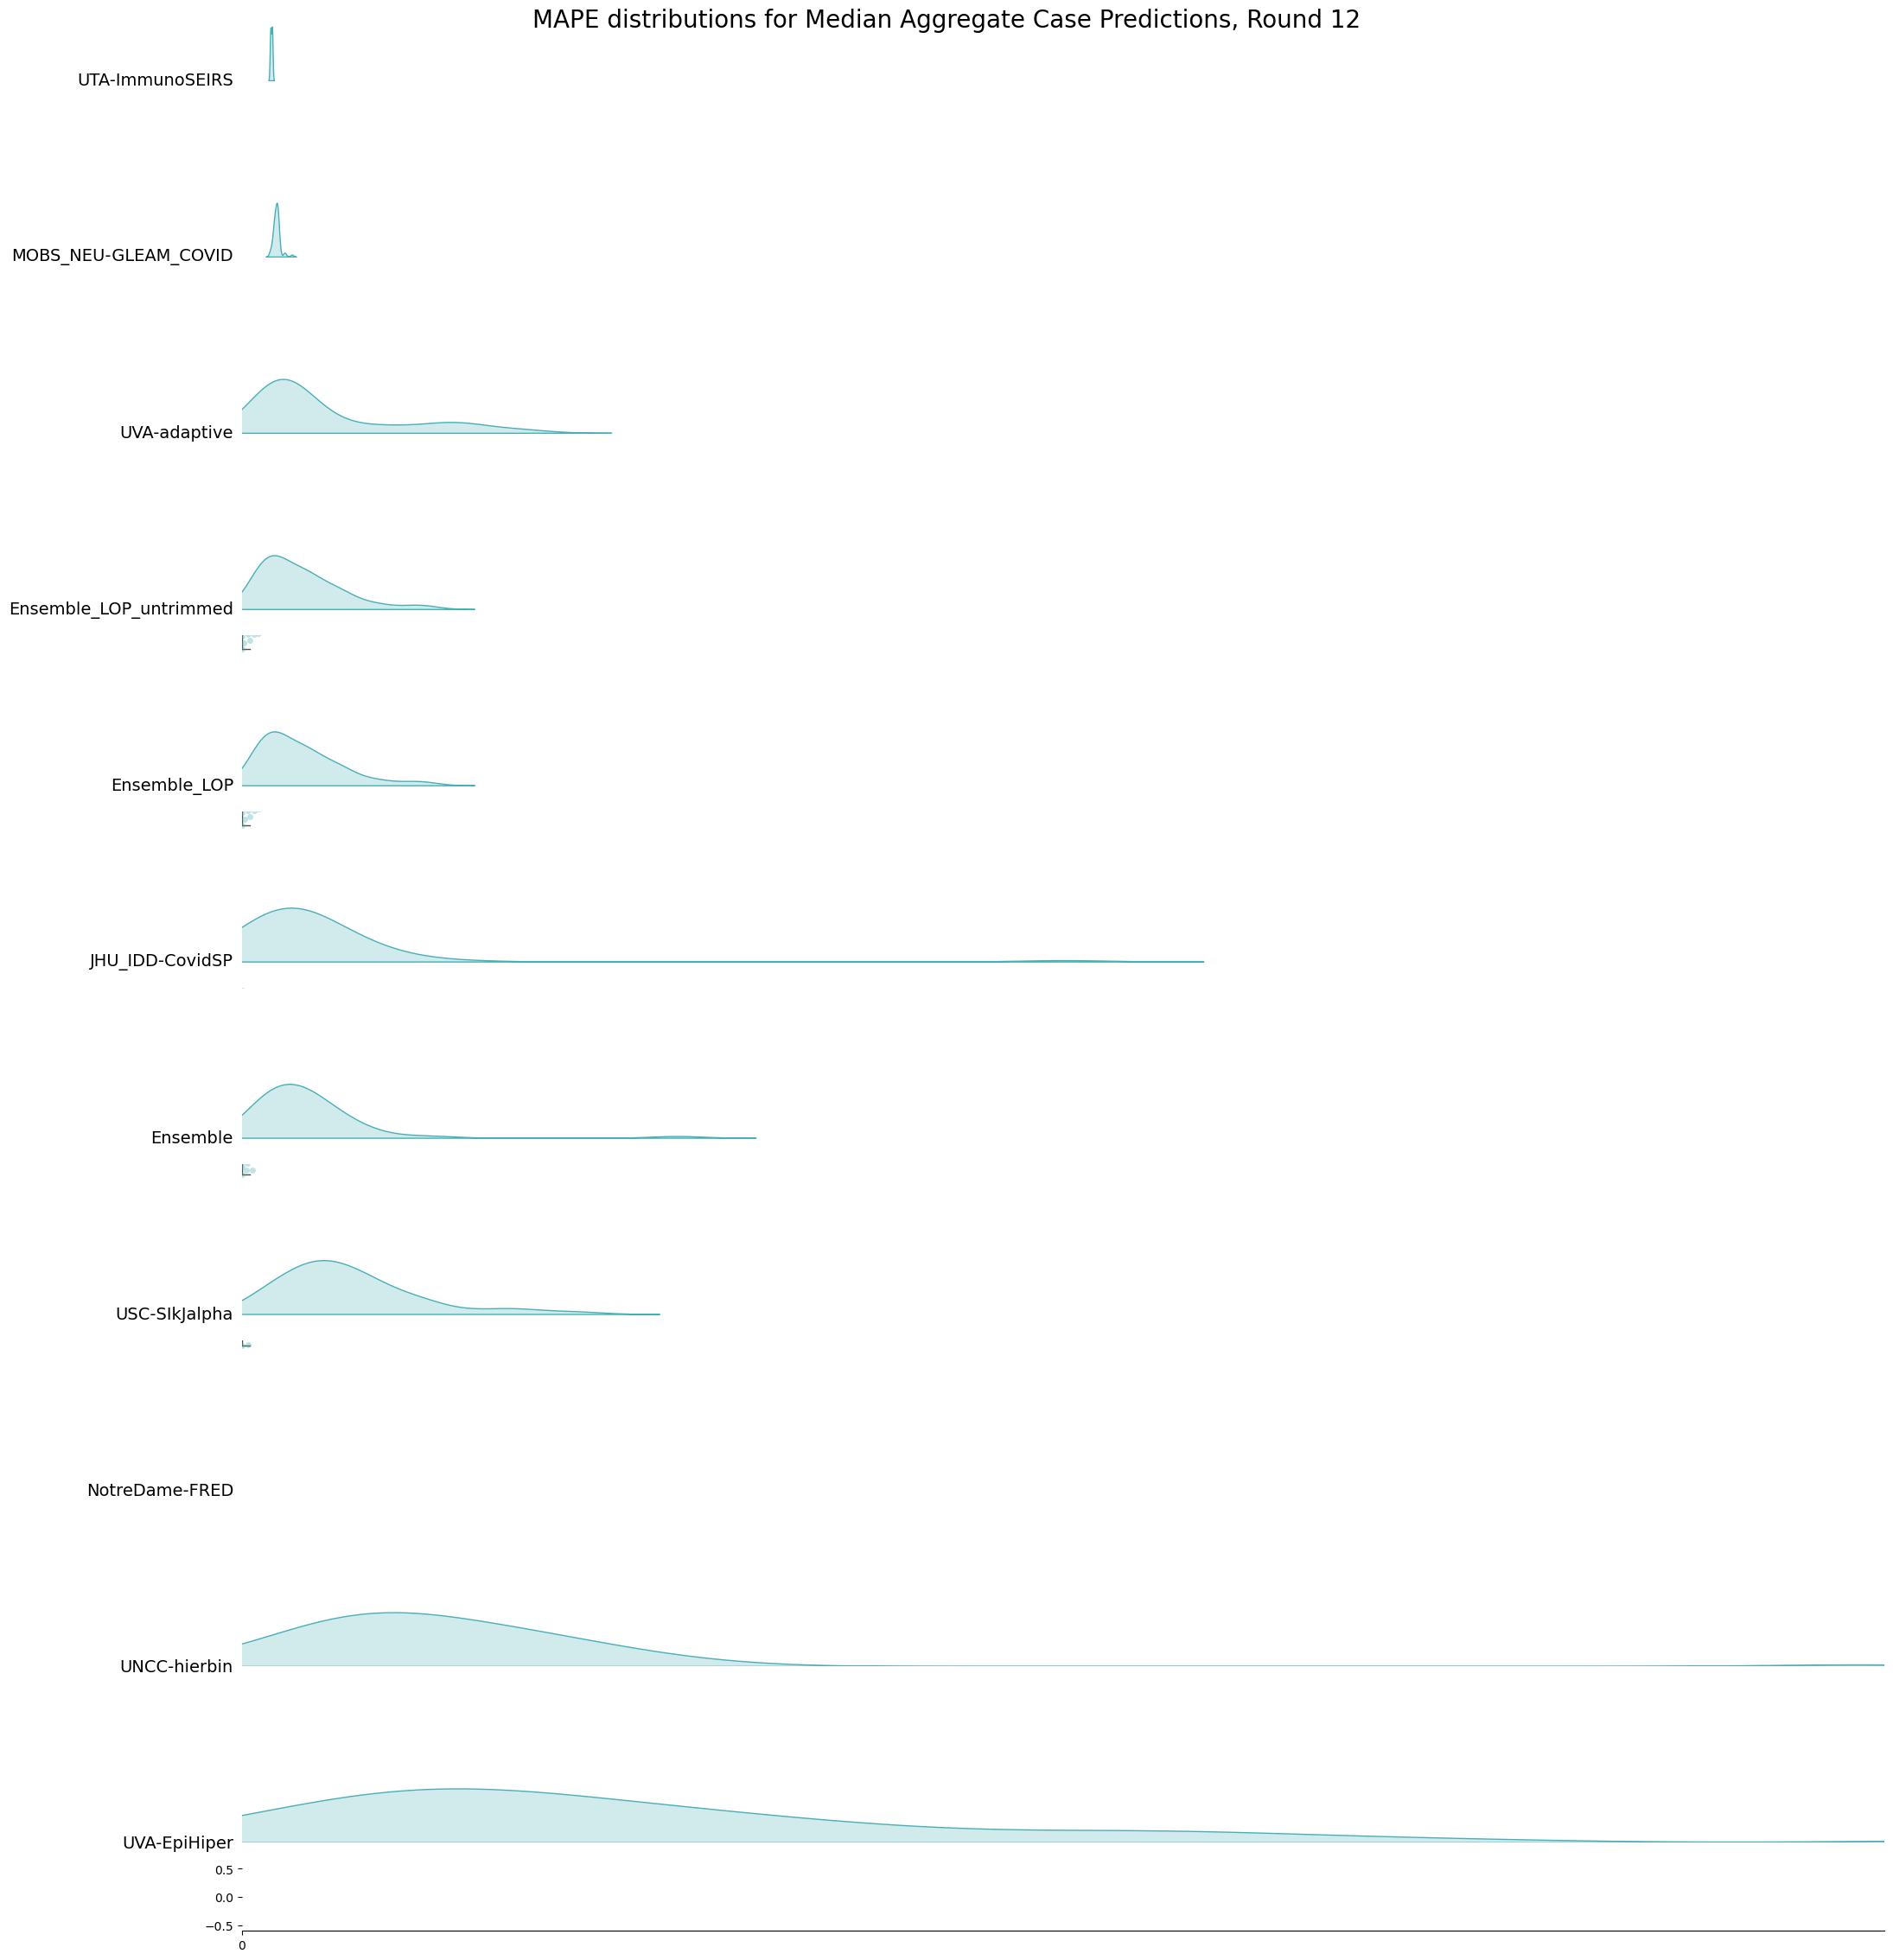

In [17]:
fig, ax_mat = create_penguin_plots(df_case_mape,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'MAPE distributions for Median Aggregate Case Predictions, Round 12')
#plt.savefig('distributionsplot_hosp.pdf')

In [112]:
mapealldf = pd.concat([df_case_mape, df_death_mape, df_hosp_mape])

In [113]:
mapealldf = mapealldf[mapealldf.group != 'NotreDame-FRED']
mapealldf = mapealldf[mapealldf.group != 'UTA-ImmunoSEIRS']

In [114]:
models = list(mapealldf.group.unique())
allmed = []
for model in models:
    med = mapealldf[mapealldf['group']== model]['values'].median()
    allmed.append(med)
    
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]

mapealldf.group = mapealldf.group.astype("category")
mapealldf.group = mapealldf.group.cat.set_categories(modelorder)
mapealldf.sort_values(["group"])


,group,Location,Population,values
152,Ensemble_LOP_untrimmed,Wyoming,578759.0,0.431441
144,Ensemble_LOP_untrimmed,Tennessee,6829174.0,0.608970
143,Ensemble_LOP_untrimmed,South Dakota,884659.0,0.548551
142,Ensemble_LOP_untrimmed,South Carolina,5148714.0,0.705523
141,Ensemble_LOP_untrimmed,Rhode Island,1059361.0,0.410508
...,...,...,...,...
327,USC-SIkJalpha,Massachusetts,6892503.0,4.319108
328,USC-SIkJalpha,Michigan,9986857.0,2.489455
329,USC-SIkJalpha,Minnesota,5639632.0,3.016285
319,USC-SIkJalpha,Illinois,12671821.0,2.350398


Ensemble_LOP_untrimmed 0.5506671484288412
Ensemble_LOP 0.5517185680535264
Ensemble 0.5680636243674698
JHU_IDD-CovidSP 0.6617933409672215
UNCC-hierbin 0.7548080523592886
MOBS_NEU-GLEAM_COVID 0.8296073564924171
UVA-adaptive 0.9405616251652198
UVA-EpiHiper 1.9088370138746775
USC-SIkJalpha 2.526954319870679
[ 0.  2.  4.  6.  8. 10. 12.]


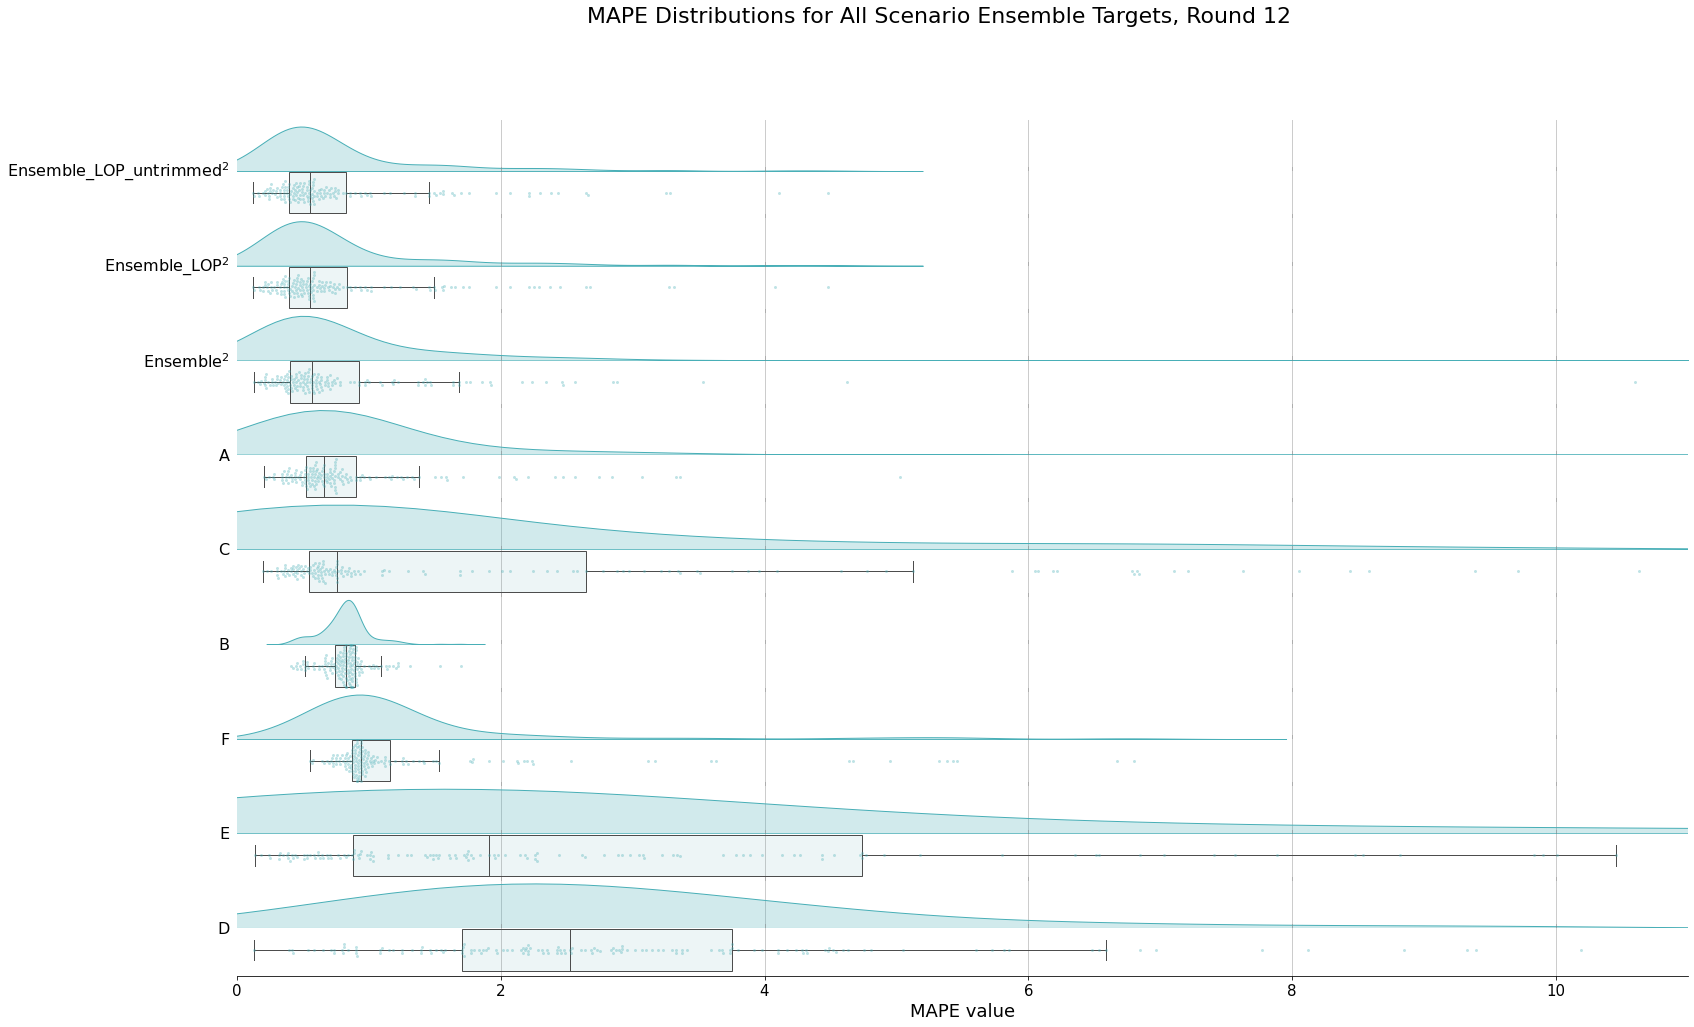

In [68]:
fig, ax_mat = create_penguin_plots(mapealldf,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'MAPE Distributions for All Scenario Ensemble Targets, Round 12')

plt.savefig('MAPEdist_55.pdf')

# All rounds

Ensemble 1.0138793020632813
[ 0.  5. 10. 15. 20. 25. 30. 35. 40.]
Ensemble_LOP 0.2982261948624054
Ensemble 0.3130581019706227
[ 0.  5. 10. 15. 20. 25. 30. 35. 40.]
Ensemble_LOP 0.7487567920053807
Ensemble 0.758954216770637
[ 0.  5. 10. 15. 20. 25. 30. 35. 40.]
Ensemble_LOP 0.8018272701894212
Ensemble 0.8058852567498546
[ 0.  5. 10. 15. 20. 25. 30. 35. 40.]
Ensemble 0.403876292587433
Ensemble_LOP 0.409350569364071
Ensemble_LOP_untrimmed 0.41170875550441816
[ 0.  5. 10. 15. 20. 25. 30. 35. 40.]
Ensemble 0.6110008407750296
Ensemble_LOP 0.6150753632599117
Ensemble_LOP_untrimmed 0.6175396272029334
[ 0.  5. 10. 15. 20. 25. 30. 35. 40.]
Ensemble_LOP_untrimmed 0.40962339426235184
Ensemble_LOP 0.4116044006390787
Ensemble 0.42579912290162475
[ 0.  5. 10. 15. 20. 25. 30. 35. 40.]
Ensemble_LOP_untrimmed 0.5506671484288412
Ensemble_LOP 0.5517185680535264
Ensemble 0.5680636243674698
[ 0.  5. 10. 15. 20. 25. 30. 35. 40.]
Ensemble_LOP 0.576480040384138
Ensemble_LOP_untrimmed 0.5842500469779829
Ensembl

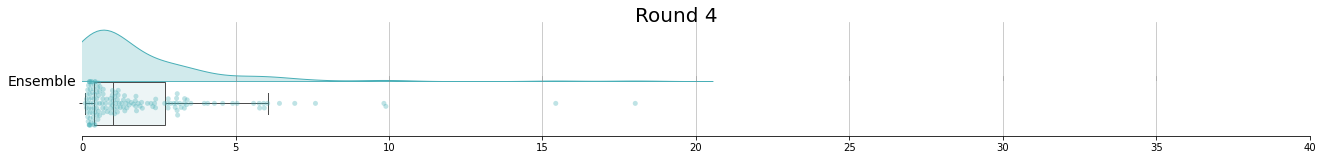

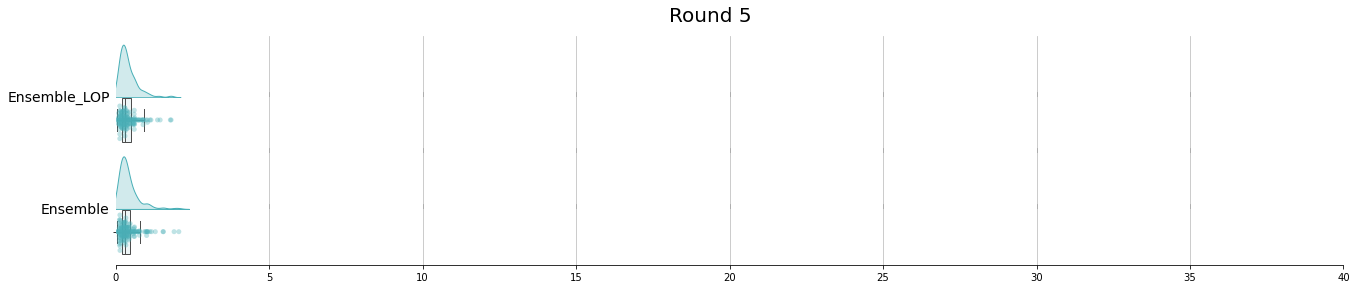

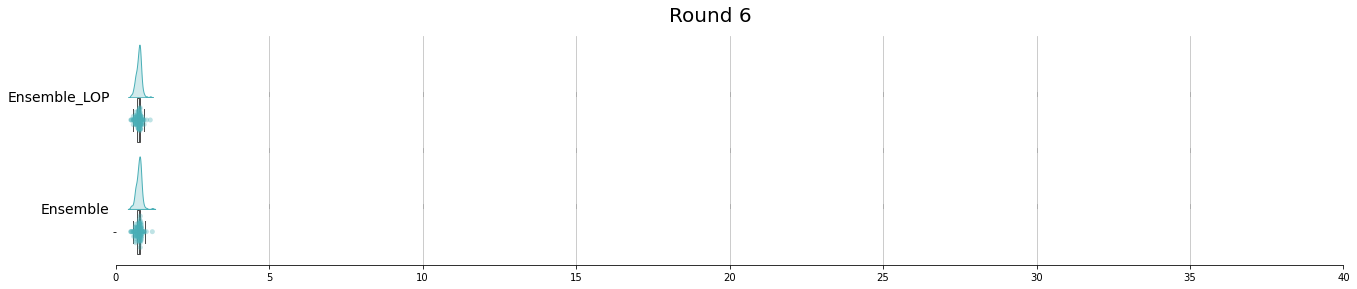

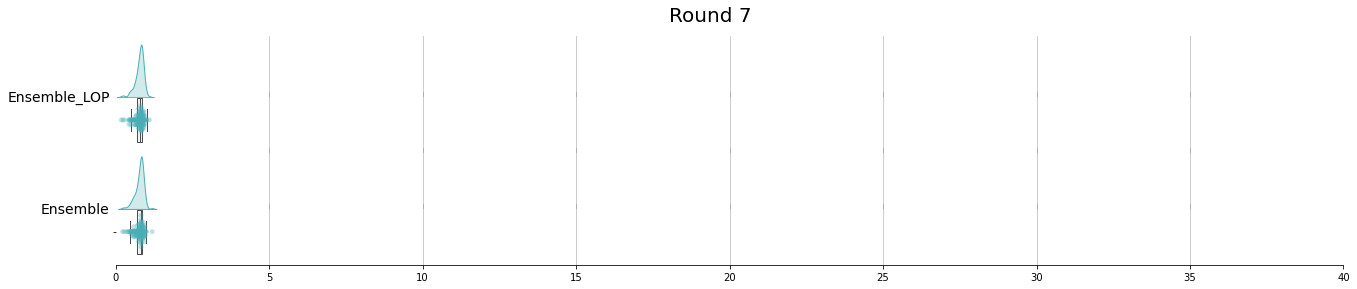

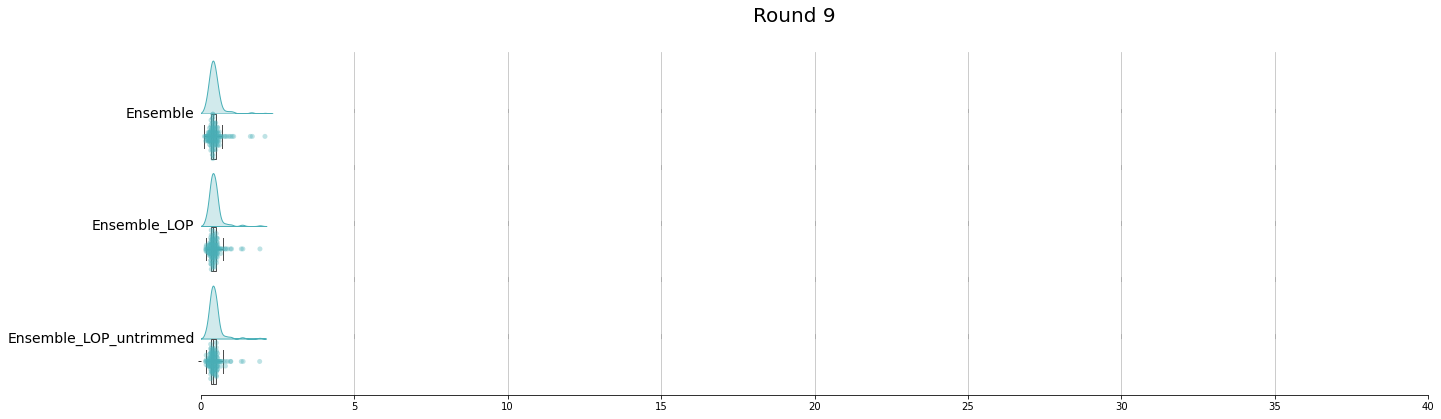

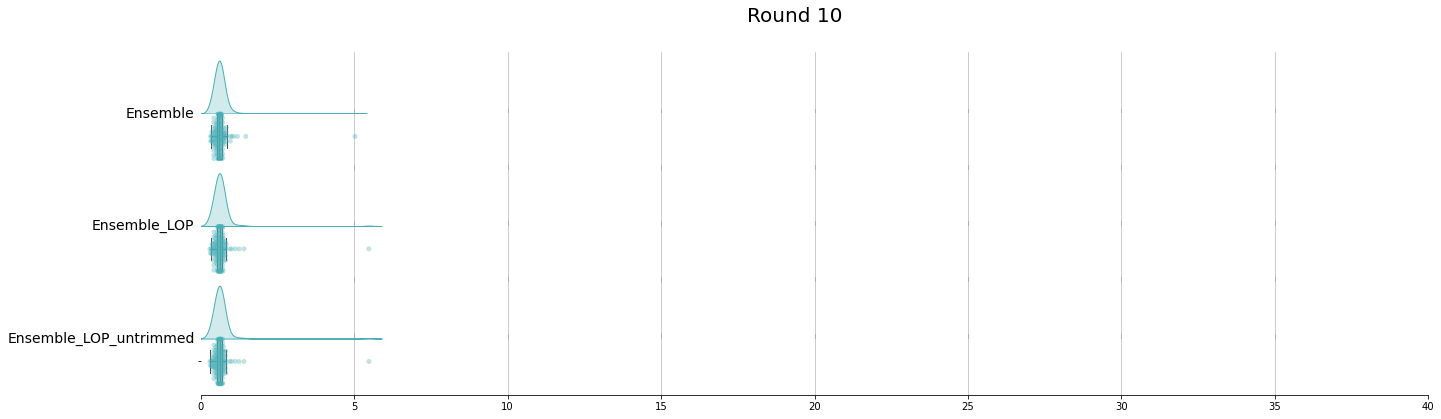

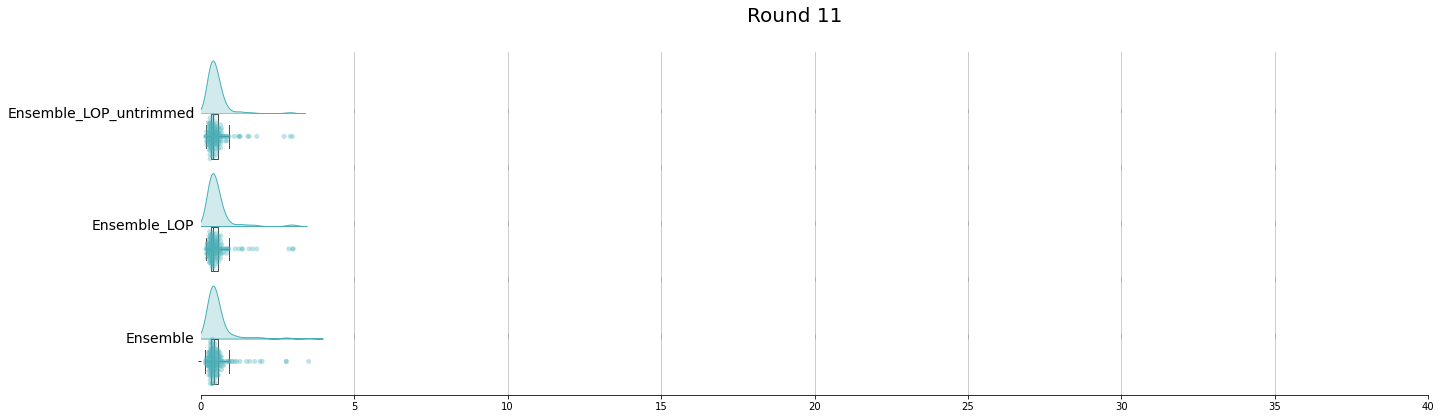

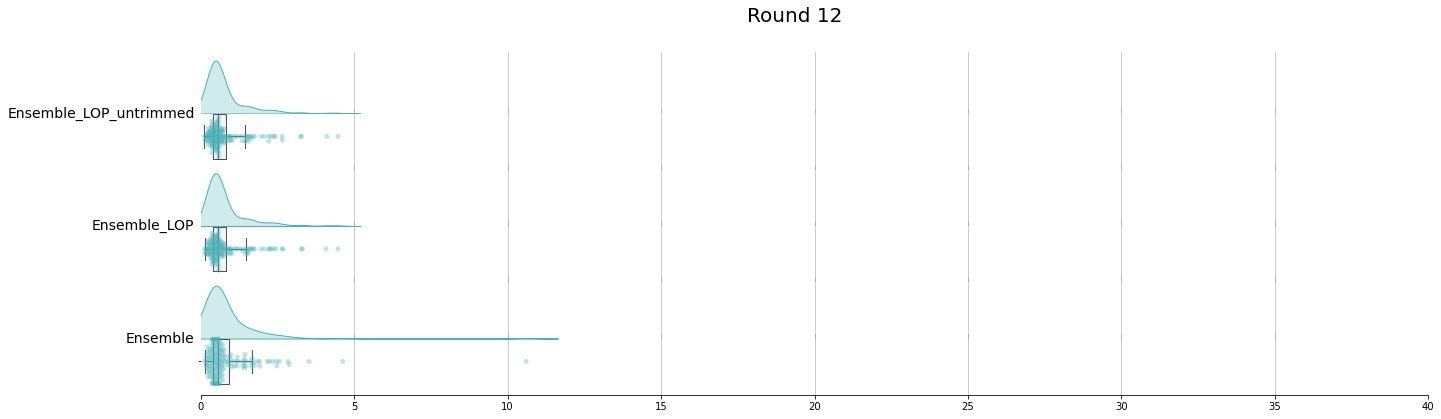

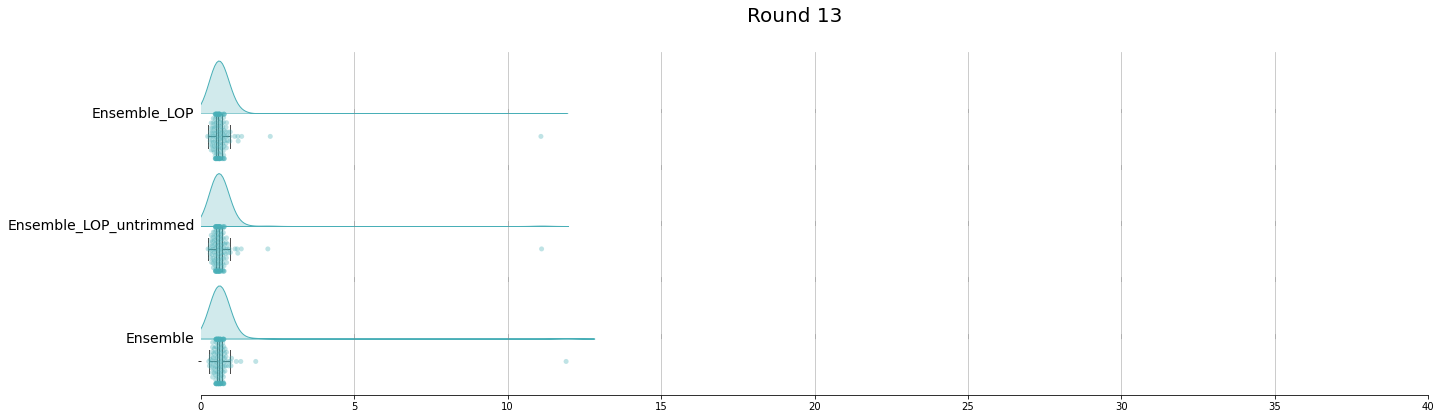

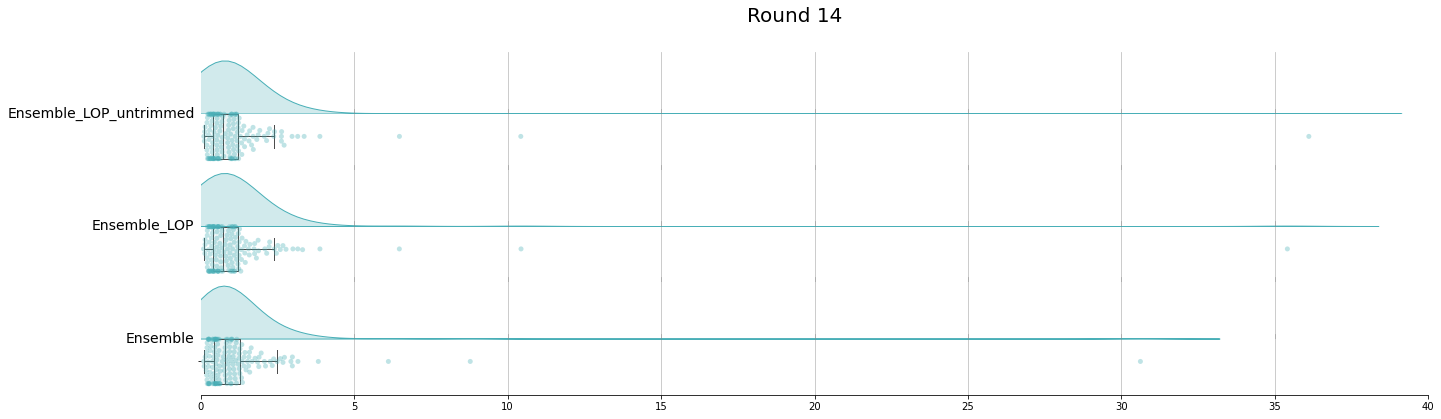

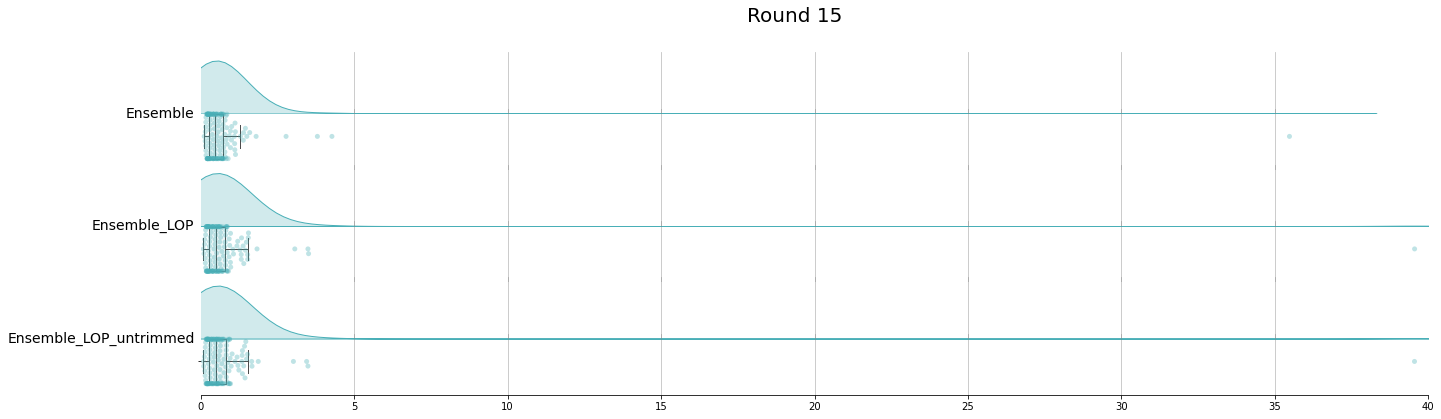

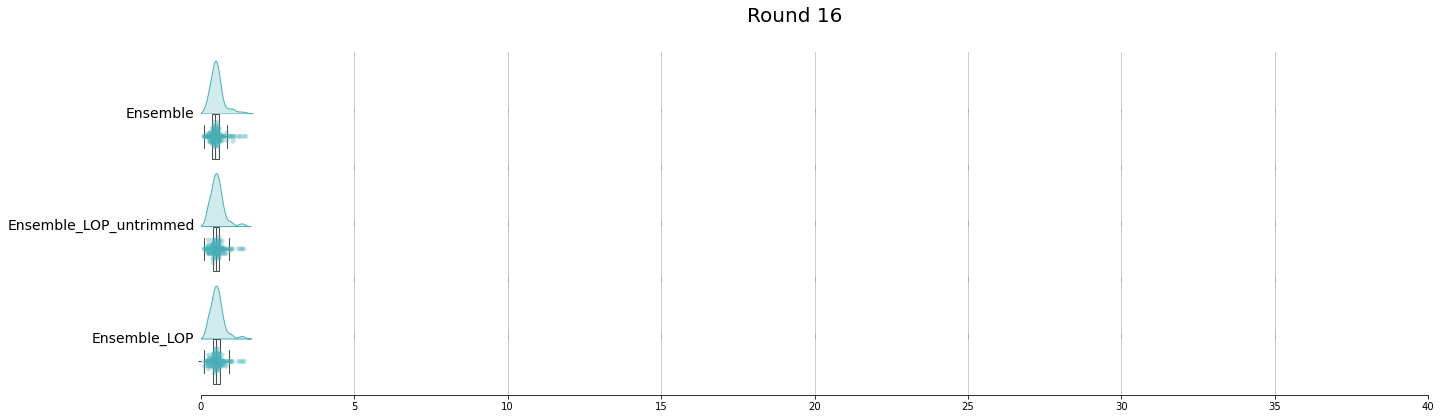

In [80]:
rds = [4, 5, 6, 7, 9, 10, 11, 12, 13, 14 ,15, 16]



for rd in rds:
    mapealldf = pd.DataFrame()
    
    df_hosp_mape = pd.read_pickle(f'mapeval_hosp_rd{rd}.pkl')
    df_death_mape = pd.read_pickle(f'mapeval_death_rd{rd}.pkl')
    df_case_mape = pd.read_pickle(f'mapeval_case_rd{rd}.pkl')

    df_hosp_mape = df_hosp_mape.rename(columns= {"MAPE":"values","Model":"group"})
    df_death_mape = df_death_mape.rename(columns= {"MAPE":"values","Model":"group"})
    df_case_mape = df_case_mape.rename(columns= {"MAPE":"values","Model":"group"})

    mapealldf = pd.concat([df_case_mape, df_death_mape, df_hosp_mape])

    models = list(mapealldf.group.unique())
    allmed = []
    for model in models:
        med = mapealldf[mapealldf['group']== model]['values'].median()
        allmed.append(med)

    a = zip(models, allmed)
    a=list(a)
    res = sorted(a, key = lambda x: x[1])
    modelorder = list(zip(*res))[0]

    mapealldf.group = mapealldf.group.astype("category")
    mapealldf.group = mapealldf.group.cat.set_categories(modelorder)
    mapealldf.sort_values(["group"])

    ax1 = create_penguin_plots(mapealldf,kde_args = {"lw":1,"bw_adjust":.9}, title = f'Round {rd}')

    plt.savefig(f'mapedistributionsplot_normaxis_all_ensembles_rd{rd}.pdf')

In [86]:
rds = [5, 6, 7, 9, 10, 11, 12, 13, 14 ,15, 16]

mapeallrd = pd.DataFrame()

for rd in rds:
    mapealldf = pd.DataFrame()
    
    df_hosp_mape = pd.read_pickle(f'mapeval_hosp_rd{rd}.pkl')
    df_death_mape = pd.read_pickle(f'mapeval_death_rd{rd}.pkl')
    df_case_mape = pd.read_pickle(f'mapeval_case_rd{rd}.pkl')

    df_hosp_mape = df_hosp_mape.rename(columns= {"MAPE":"values","Model":"group"})
    df_death_mape = df_death_mape.rename(columns= {"MAPE":"values","Model":"group"})
    df_case_mape = df_case_mape.rename(columns= {"MAPE":"values","Model":"group"})

    mapealldf = pd.concat([df_case_mape, df_death_mape, df_hosp_mape])


    mapeallrd = pd.concat([mapeallrd, mapealldf])

Ensemble_LOP_untrimmed 0.5288500275869319
Ensemble 0.5666949200335123
Ensemble_LOP 0.5683565231133278
[0. 1. 2. 3. 4. 5. 6.]


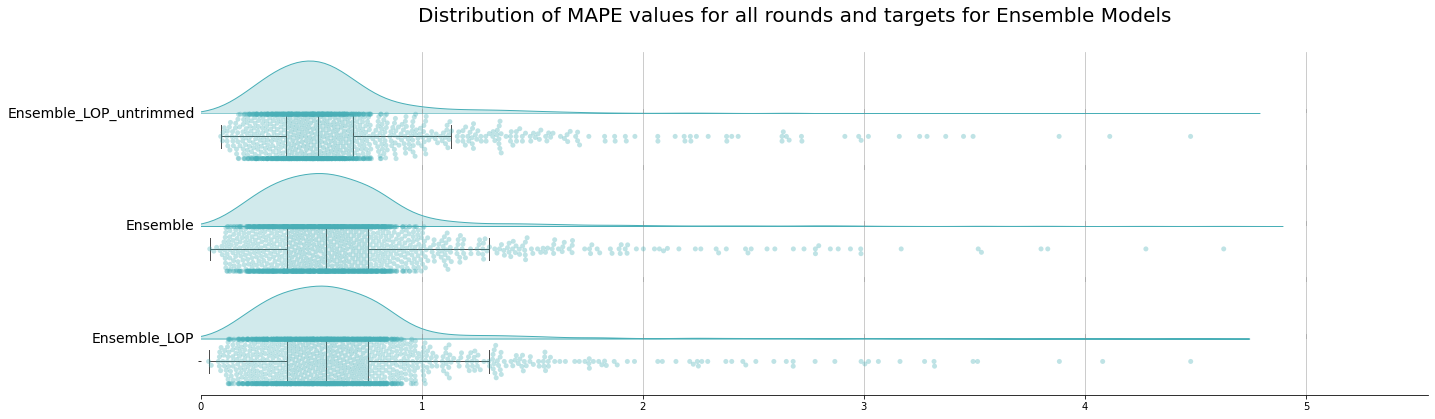

In [97]:
models = list(mapeallrd.group.unique())
allmed = []
for model in models:
    med = mapeallrd[mapeallrd['group']== model]['values'].median()
    allmed.append(med)

a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]

mapeallrd.group = mapeallrd.group.astype("category")
mapeallrd.group = mapeallrd.group.cat.set_categories(modelorder)
mapeallrd.sort_values(["group"])

ax1 = create_penguin_plots(mapeallrd[mapeallrd['values']<=5],kde_args = {"lw":1,"bw_adjust":.9}, title = f'Distribution of MAPE values for all rounds and targets for Ensemble Models')

plt.savefig(f'mapedistributionsplot_allrds_aggregate_trimmed.pdf')

In [93]:
mapeallrd[mapeallrd['values'] >5].Location.unique()

array(['Nebraska', 'Florida', 'Kansas'], dtype=object)

In [98]:
mapeallrd[mapeallrd['values'] >5]

,group,Location,Population,values
27,Ensemble,Nebraska,1934408.0,5.028865
78,Ensemble_LOP,Nebraska,1934408.0,5.476069
129,Ensemble_LOP_untrimmed,Nebraska,1934408.0,5.481059
27,Ensemble,Nebraska,1934408.0,10.603283
27,Ensemble,Nebraska,1934408.0,11.905935
78,Ensemble_LOP,Nebraska,1934408.0,11.085726
129,Ensemble_LOP_untrimmed,Nebraska,1934408.0,11.107224
9,Ensemble,Florida,21477737.0,30.618871
60,Ensemble_LOP,Florida,21477737.0,35.407555
111,Ensemble_LOP_untrimmed,Florida,21477737.0,36.107387


# Log transformed

In [92]:
def create_penguin_plots_log(data,kde_args, title ,color = "#49AFB7",color_category=None, group2name = None):
    
    """
    input:
    data (pandas dataframe): with the two columns named group and values
    kde_args (dictionary): contains information for the kde (lw is the line with, bw_adjust changes the smoothing), look up these args in seaborns kde plots to get more info
    color category: colors the dots different colors depending other whether you want to show that
    group2name (dict): keys are the groups (whatever is in the group column) and values are the "names"
    
    output: fig/ax of figure
    """
    data['values'] = np.log10(data['values'])

    total_groups = data.group.unique().shape[0]
    total_min = data['values'].min()*-1.2
    total_max = data['values'].max()*1.2


    fig, ax = plt.subplots(total_groups*2,1,figsize = (26,total_groups*1.75),tight_layout = False)
    
    plt.subplots_adjust(hspace=-.08)

    i = 0
    for group, df in data.groupby("group"):


        values = df["values"].values # this is the list of values you are showing in your distribution
        print(group,np.median(values))


        #distribution
        sns.kdeplot(values, ax = ax[i],shade=True,lw=kde_args["lw"],bw_adjust=kde_args["bw_adjust"],color = color,)
        #sns.distplot(US_values, ax = ax[i],hist = False,
        #      kde_kws={"shade":False,"lw":"3"},color = "w")

        min_,max_ = ax[i].get_ylim()

        ax[i].set_ylim(ymin = 0, ymax = max_*1.1)

        
        
        sns.boxplot(values,ax = ax[i+1],color = color, showfliers = False, linewidth=1, orient="h")
        for patch in ax[i+1].patches:
            r, g, b, a = patch.get_facecolor()
            patch.set_facecolor((r, g, b, .1))
            #fc = patch.get_facecolor()
            #patch.set_facecolor(mpl.colors.to_rgba(fc, 0.1))

        if color_category:
            cmap = mpl.cm.get_cmap('Set2', df.continent_label.unique().shape[0])
            ci = 0
            for cont, df_cont in df.groupby(color_category):
                sns.swarmplot(df_cont['values'].values,ax = ax[i+1],color = cmap(ci),alpha = .9,label = cont)
                ci+=1
            if i+1 ==1:
                ax[i+1].legend(loc = 1, prop= prop_light)
        else:
            sns.swarmplot(values,ax = ax[i+1],color = color,alpha = .35,size=3, orient="h") 

        ax[i].axis("off")
        ax[i+1].axis("off")
        
        ax[i+1].set(yticklabels=[])
        ax[i+1].tick_params(left=False)
        
        
      #  ax[i+1].set_xlim(xmin = total_min,xmax = total_max)
       # ax[i].set_xlim(xmin = total_min,xmax = total_max)
        
        ax[i+1].set_xlim(xmin = -1.5,xmax = 1.75)
        ax[i].set_xlim(xmin = -1.5,xmax = 1.75)
        
        #ax[i+1].set_ylim(-.5,.5)
        
        
        #if i != 6:
        #    ax[i+1].hlines(y = -.6,xmin = total_min,xmax = total_max,linewidth = 2,zorder = 100,color = "#49AFB7")
        groupnames = modelmap[group]
        text = "%s"
        if group2name:
            ax[i].text(.03,0,group2name[group],transform=ax[i].transAxes,  horizontalalignment= "right",\
               fontsize = 14, verticalalignment='center',backgroundcolor = "w")
        else:
            ax[i].text(-.005,0,groupnames,transform=ax[i].transAxes,  horizontalalignment= "right",\
               fontsize = 16, verticalalignment='center',backgroundcolor = "w")
        i +=2
    last = i+1-2
    ax[last].axis("on")
    ax[last].spines["top"].set_visible(False)
    ax[last].spines["left"].set_visible(False)
    ax[last].spines["right"].set_visible(False)
    ax[last].set_facecolor("none")


    #Test
    ticks = ax[last].get_xticks()
    ax[last].tick_params(axis='x', labelsize=15)
    print(ticks)
    #ax[last-1].set_xticks([round(i,4) for i in ticks])
    #ax[last].set_xticklabels(["{:,}".format(int(i)) for i in ticks],  fontsize = 16)
    #ax[last-1].set_xticklabels([round(i,4) for i in ticks],  fontsize = 16)
    
    for t in ticks:
        if t != 0:
            for ii in range(total_groups*2):
                ax[ii].axvline(x = t,ymin = -1,ymax= 2,linewidth = .8,zorder = 0,color = "gray",alpha = 0.5)
                #ax[ii].vlines(x = t+5000,ymin = -.5,ymax= .444,linewidth = .8,zorder = 0,color = "gray",alpha = 0.5)
    plt.suptitle(title, fontsize=22)
    
    plt.xlabel('Log MAPE value ', fontsize=18)

    return fig, ax



Ensemble_LOP -0.440224579617982
Ensemble -0.4159287307251201
JHU_IDD-CovidSP -0.3324045703917634
Ensemble_LOP_untrimmed -0.32656900860180893
UNCC-hierbin -0.1684308565560914
MOBS_NEU-GLEAM_COVID -0.16270622565726406
UVA-adaptive -0.07082070643296925
UVA-EpiHiper 0.12559958822151956
USC-SIkJalpha 0.2833380869416602
[-1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]


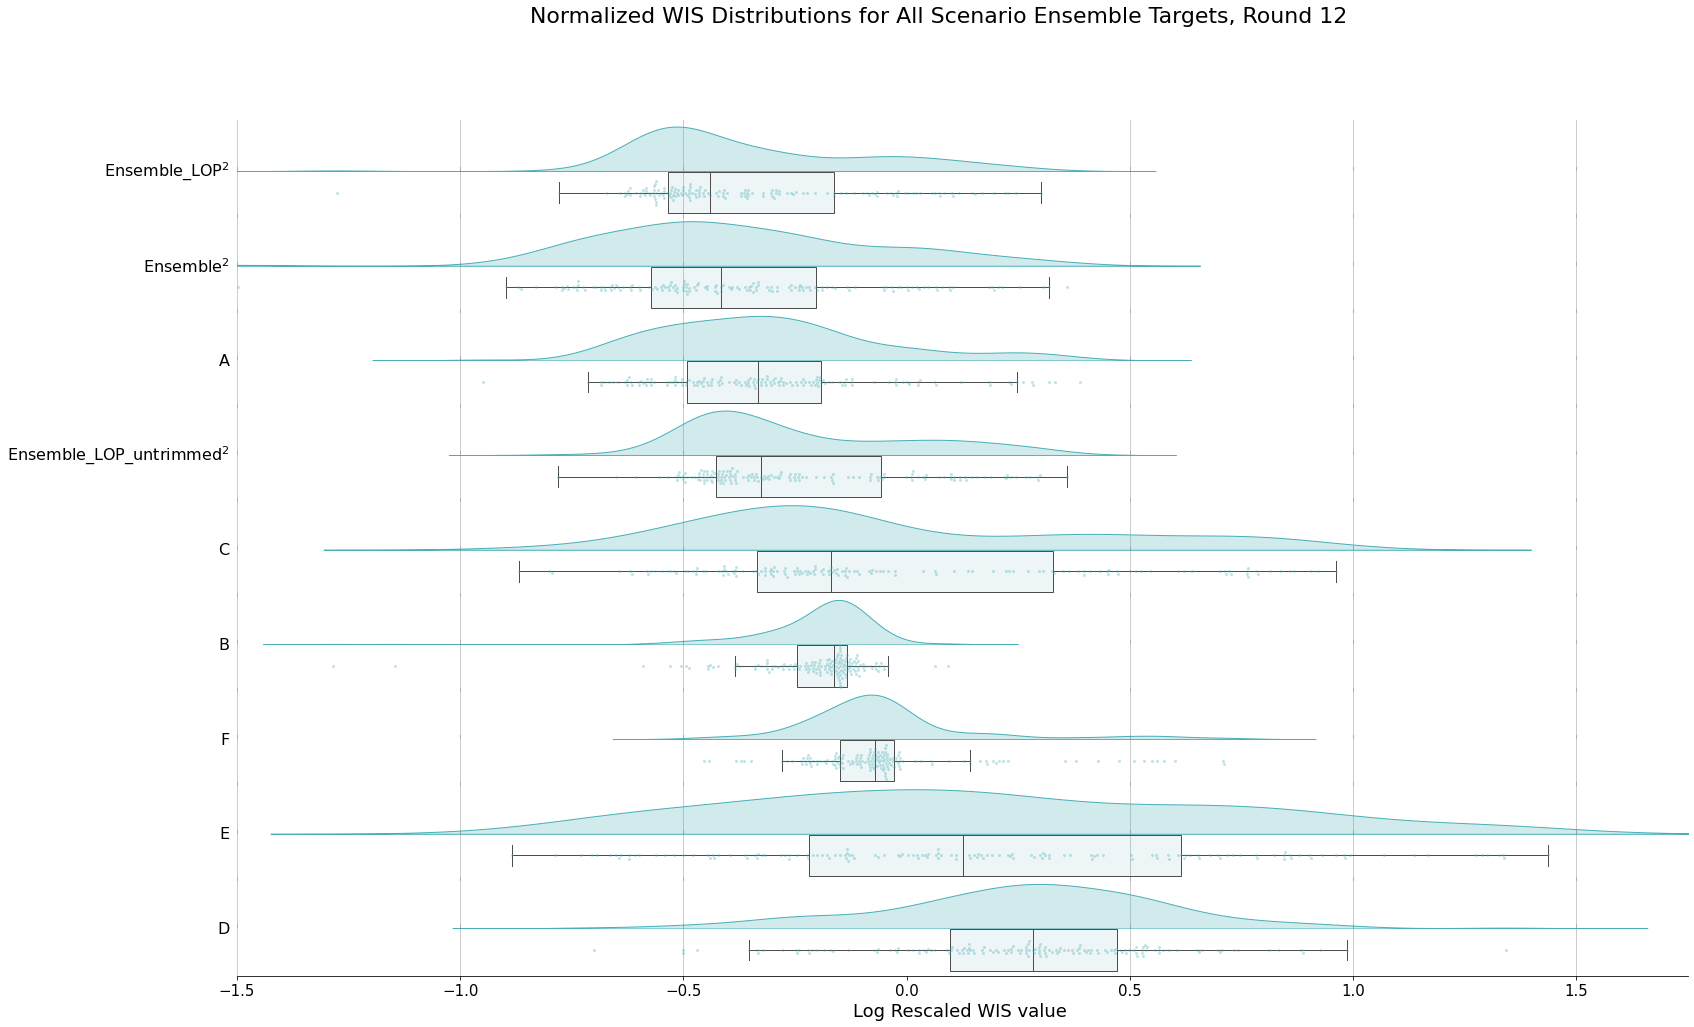

In [86]:
fig, ax_mat = create_penguin_plots_log(wisnormalldf[wisnormalldf['values'] >= 0],kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'Rescaled WIS Distributions for All Scenario Ensemble Targets, Round 12')


Ensemble_LOP_untrimmed -0.25911083178391436
Ensemble_LOP -0.2582823996429708
Ensemble -0.2456030196336239
JHU_IDD-CovidSP -0.179277607070001
UNCC-hierbin -0.1221634753903182
MOBS_NEU-GLEAM_COVID -0.08112740552222464
UVA-adaptive -0.02661274440661977
UVA-EpiHiper 0.28076884772487964
USC-SIkJalpha 0.40259739118488963
[-1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]


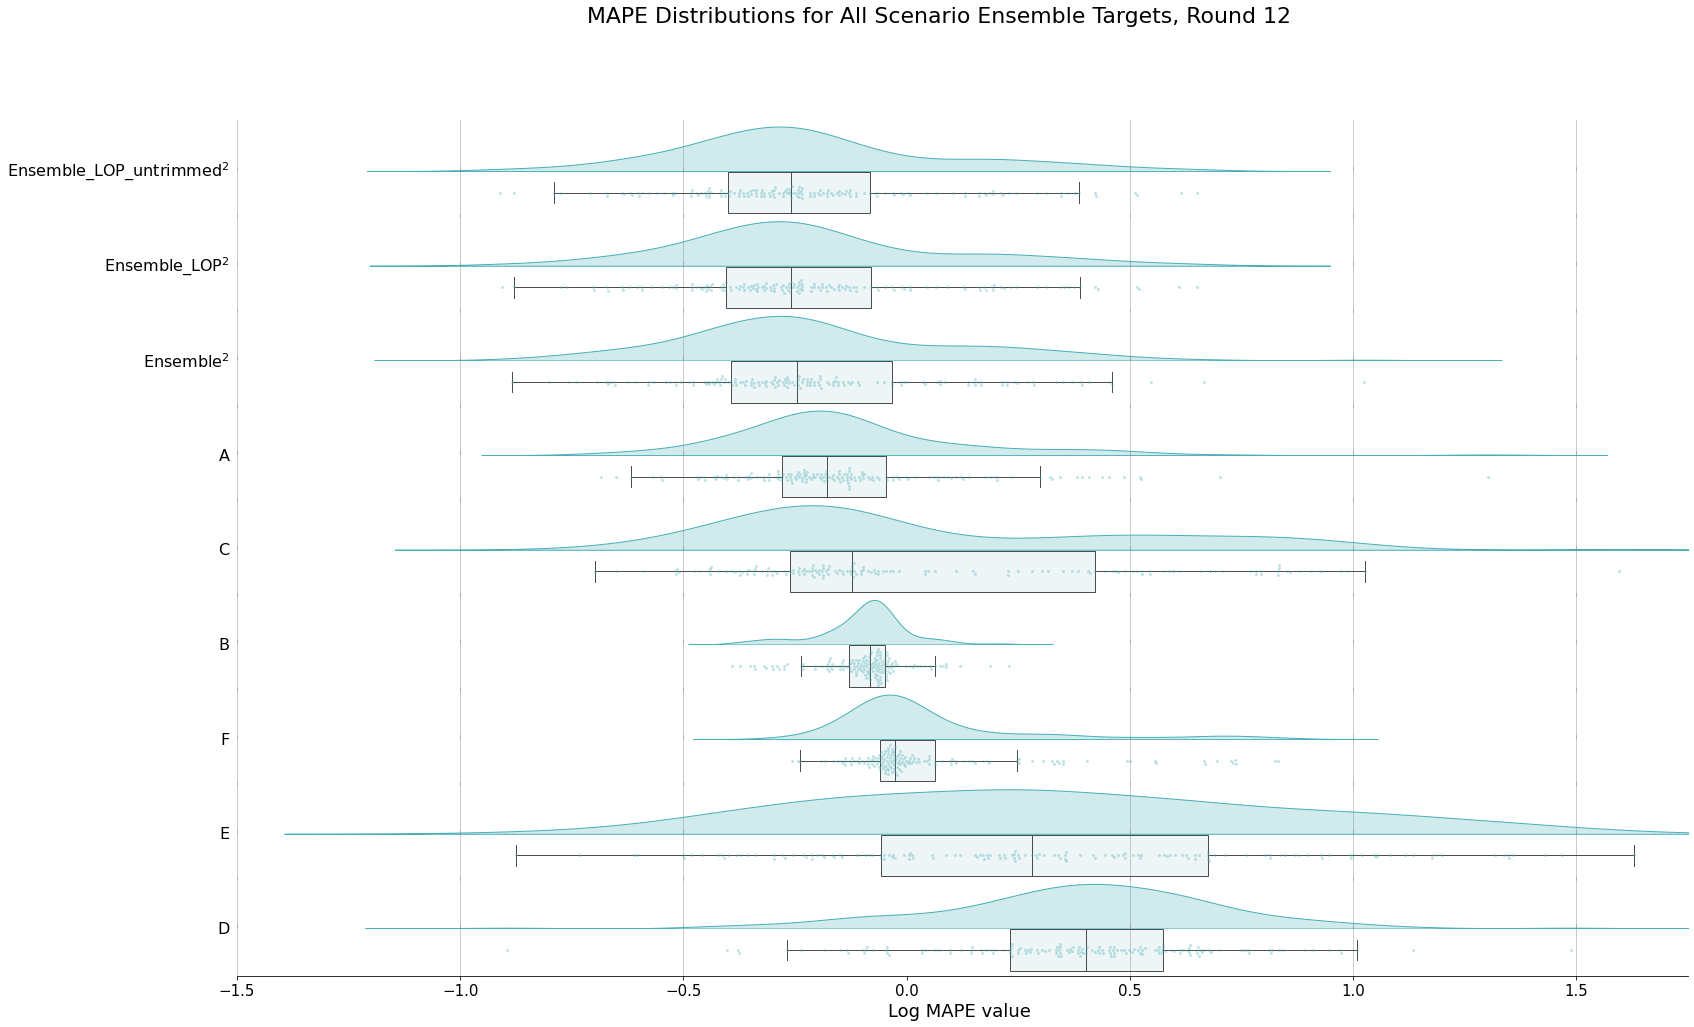

In [97]:
fig, ax_mat = create_penguin_plots_log(mapealldf,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'MAPE Distributions for All Scenario Ensemble Targets, Round 12')


Ensemble_LOP 0.36289035067723013
Ensemble 0.38377021838796804
JHU_IDD-CovidSP 0.4651525751428376
Ensemble_LOP_untrimmed 0.4714449536403899
UNCC-hierbin 0.6785301397757394
MOBS_NEU-GLEAM_COVID 0.6875333581069037
UVA-adaptive 0.8495312855334279
UVA-EpiHiper 1.3360870638408
USC-SIkJalpha 1.920168571585938


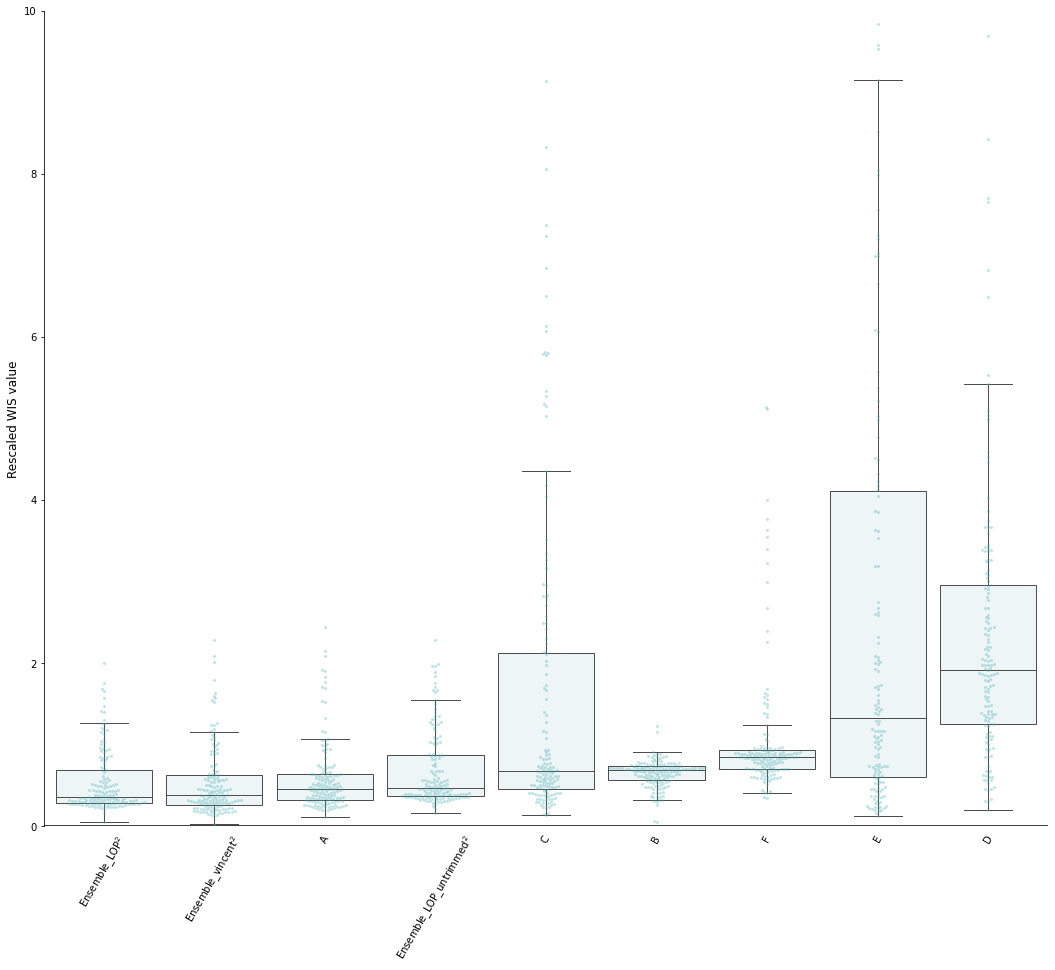

In [125]:
wisnormalldf = wisnormalldf[wisnormalldf['values'] >= 0]
total_groups = wisnormalldf.group.unique().shape[0]
total_min = 0 #data['values'].min()*-1.2
total_max = wisnormalldf['values'].max()*1.2

fig, ax = plt.subplots(1,total_groups,figsize = (18,15),tight_layout = False)
plt.subplots_adjust(wspace=-.08)
i=0
for group, df in wisnormalldf.groupby("group"):
    values = df["values"].values 
    print(group,np.median(values))
    
    sns.boxplot(values,ax = ax[i],color = "#49AFB7", showfliers = False, linewidth=1, orient="v")
    for patch in ax[i].patches:
            r, g, b, a = patch.get_facecolor()
            patch.set_facecolor((r, g, b, .1))
    sns.swarmplot(values,ax = ax[i],color = "#49AFB7",alpha = .35,size=3, orient="v") 
    
    
    #ax[i].axis("off")
    
    ax[i].tick_params(bottom=False)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    
    ax[i].set_ylim(ymin = 0,ymax = 10)
    if i != 0:
        ax[i].set(yticklabels=[])
        ax[i].tick_params(left=False)
        
    groupnames = modelmap[group]
    text = "%s"
    #ax[i].text(1,-.075,groupnames,transform=ax[i].transAxes,  horizontalalignment= "right",\
    #           fontsize = 9, verticalalignment='center',backgroundcolor = "w", rotation=45)
    ax[i].set_xticks([0])
    ax[i].set_xticklabels([groupnames], rotation=60, fontsize=10)
    
    ax[i].axhline(y = 0,xmin = -5,xmax= 5, color='black')
    
    i+=1
ax[0].axis("on")
#ax[0].set(xticklabels=[])
ax[0].tick_params(bottom=False)
ax[0].spines["top"].set_visible(False)
ax[0].spines["bottom"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[0].spines["left"].set_visible(True)
ax[0].set_facecolor("none")
ax[0].set_ylabel('Rescaled WIS value', fontsize=12)

#ticks = ax[0].get_yticks()
#ax[0].tick_params(axis='y', labelsize=15)
    
#plt.suptitle('Rescaled WIS Distributions for All Scenario Ensemble Targets, Round 12', fontsize=16)
plt.savefig('WISdist_vert_515.pdf')
plt.show()

In [101]:
wisnormalldf

,group,values,50% Coverage,95% Coverage,Location,Population,Label
0,Ensemble,0.460725,0.666667,0.916667,Alabama,4903185,Median aggregate
1,Ensemble_LOP,0.586710,0.916667,1.000000,Alabama,4903185,Median aggregate
2,Ensemble_LOP_untrimmed,0.833322,0.916667,1.000000,Alabama,4903185,Median aggregate
3,JHU_IDD-CovidSP,0.486177,0.833333,1.000000,Alabama,4903185,Median aggregate
4,MOBS_NEU-GLEAM_COVID,0.706110,0.250000,0.416667,Alabama,4903185,Median aggregate
...,...,...,...,...,...,...,...
454,MOBS_NEU-GLEAM_COVID,0.708418,0.083333,0.583333,Wyoming,578759,Median aggregate
455,UNCC-hierbin,0.649356,0.083333,0.250000,Wyoming,578759,Median aggregate
456,USC-SIkJalpha,1.666385,0.166667,0.416667,Wyoming,578759,Median aggregate
457,UVA-EpiHiper,1.034083,0.166667,0.416667,Wyoming,578759,Median aggregate


Ensemble_LOP_untrimmed 0.5506671484288412
Ensemble_LOP 0.5517185680535264
Ensemble 0.5680636243674698
JHU_IDD-CovidSP 0.6617933409672215
UNCC-hierbin 0.7548080523592886
MOBS_NEU-GLEAM_COVID 0.8296073564924171
UVA-adaptive 0.9405616251652198
UVA-EpiHiper 1.9088370138746775
USC-SIkJalpha 2.526954319870679


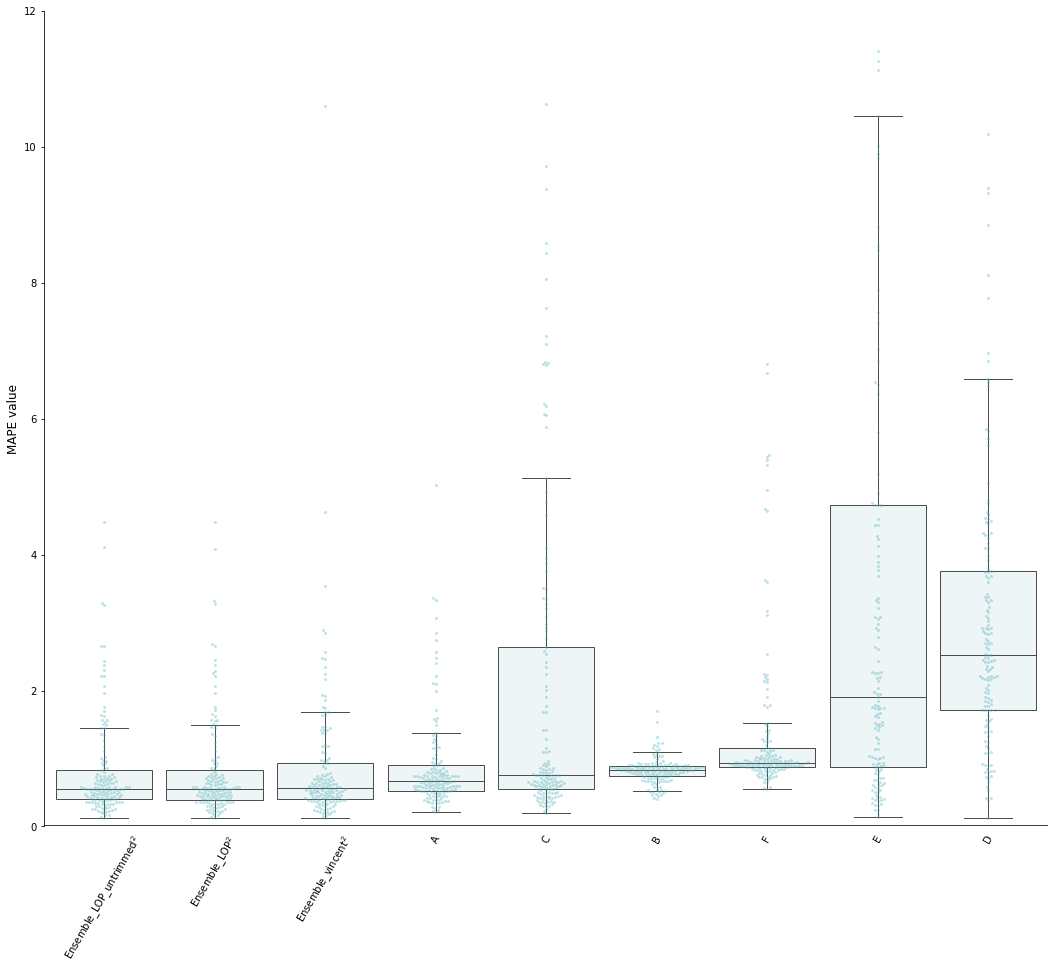

In [126]:
#mapealldf = wisnormalldf[wisnormalldf.WIS >= 0]
total_groups = mapealldf.group.unique().shape[0]
total_min = 0 #data['values'].min()*-1.2
total_max = mapealldf['values'].max()*1.2

fig, ax = plt.subplots(1,total_groups,figsize = (18,15),tight_layout = False)
plt.subplots_adjust(wspace=-.08)
i=0
for group, df in mapealldf.groupby("group"):
    values = df["values"].values 
    print(group,np.median(values))
    
    sns.boxplot(values,ax = ax[i],color = "#49AFB7", showfliers = False, linewidth=1, orient="v")
    for patch in ax[i].patches:
            r, g, b, a = patch.get_facecolor()
            patch.set_facecolor((r, g, b, .1))
    sns.swarmplot(values,ax = ax[i],color = "#49AFB7",alpha = .35,size=3, orient="v") 
    
    
    #ax[i].axis("off")
    
    ax[i].tick_params(bottom=False)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    
    ax[i].set_ylim(ymin = 0,ymax = 12)
    if i != 0:
        ax[i].set(yticklabels=[])
        ax[i].tick_params(left=False)
        
    groupnames = modelmap[group]
    text = "%s"
    #ax[i].text(1,-.075,groupnames,transform=ax[i].transAxes,  horizontalalignment= "right",\
    #           fontsize = 9, verticalalignment='center',backgroundcolor = "w", rotation=45)
    ax[i].set_xticks([0])
    ax[i].set_xticklabels([groupnames], rotation=60, fontsize=10)
    
    ax[i].axhline(y = 0,xmin = -5,xmax= 5, color='black')
    
    i+=1
ax[0].axis("on")
#ax[0].set(xticklabels=[])
ax[0].tick_params(bottom=False)
ax[0].spines["top"].set_visible(False)
ax[0].spines["bottom"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[0].spines["left"].set_visible(True)
ax[0].set_facecolor("none")
ax[0].set_ylabel('MAPE value', fontsize=12)

#ticks = ax[0].get_yticks()
#ax[0].tick_params(axis='y', labelsize=15)
    
#plt.suptitle('MAPE Distributions for All Scenario Ensemble Targets, Round 12', fontsize=16)
plt.savefig('MAPEdist_vert_515.pdf')
plt.show()